#  **Undressing the Customer Mind: Deep Dive into Spending Behavior and Campaign Response**
#### **Naufal Fajar Revanda   //   JCDS-0808-009**

In [ ]:
# Importing essential libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [ ]:
# Load CSV

df = pd.read_csv(r'D:\Documents\0. JCDS\Module 2 - Data Analys\Capstone Project Module 2\Dataset\Supermarket Customers.csv', sep='\t')

## **1. Background and Business Understanding**
### **1.1 Executive Summary**

In today’s competitive retail market, understanding customer behavior is essential for effective marketing strategies. Since not all customers respond the same way to campaigns, segmentation and response analysis are critical.  

This analysis focuses on two priorities:  

1. **High-Value Customers (HVC):** Customers who generate significant revenue and demonstrate strong loyalty. Identifying their profiles enables tailored retention strategies.  

2. **Campaign Responsiveness:** Analyzing how different customer segments respond to campaigns provides insights into engagement levels, helping optimize targeting, improve conversion rates, and allocate resources more effectively.  

By distinguishing between customer segments and their behaviors, businesses can design precise strategies to strengthen loyalty, maximize lifetime value, and enhance overall marketing performance.  

### **1.2 Problem Statements**
1. What are the characteristics of High-Value Customers (HVCs, and what strategies can be implemented to retain them?  
2. What are the characteristics of customer responses to campaigns, and what strategies can be implemented to improve them?  

### **1.3 Key Objective**
The primary objective of this project is to analyze customer and marketing campaign data in order to:  

- Identify the characteristics of high-value customers and develop data-driven strategies to retain them.  
- Identify the characteristics of customer responses to marketing campaigns and determine appropriate strategies to enhance effectiveness.  

## **2. Data Understanding**
### **2.1 General Information**

**DATA DICTIONARY**

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [ ]:
# columns reordering

df = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
         'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
         'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
         'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
         'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']]

In [ ]:
# summary of dataset
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [ ]:
# shape of the dataset
df.shape

(2240, 29)

### **2.2 Feature Information**

In [ ]:
# check existing columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# check columns data type
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### **2.3 Statistics Summary**

In [ ]:
# Checks for non-null and the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

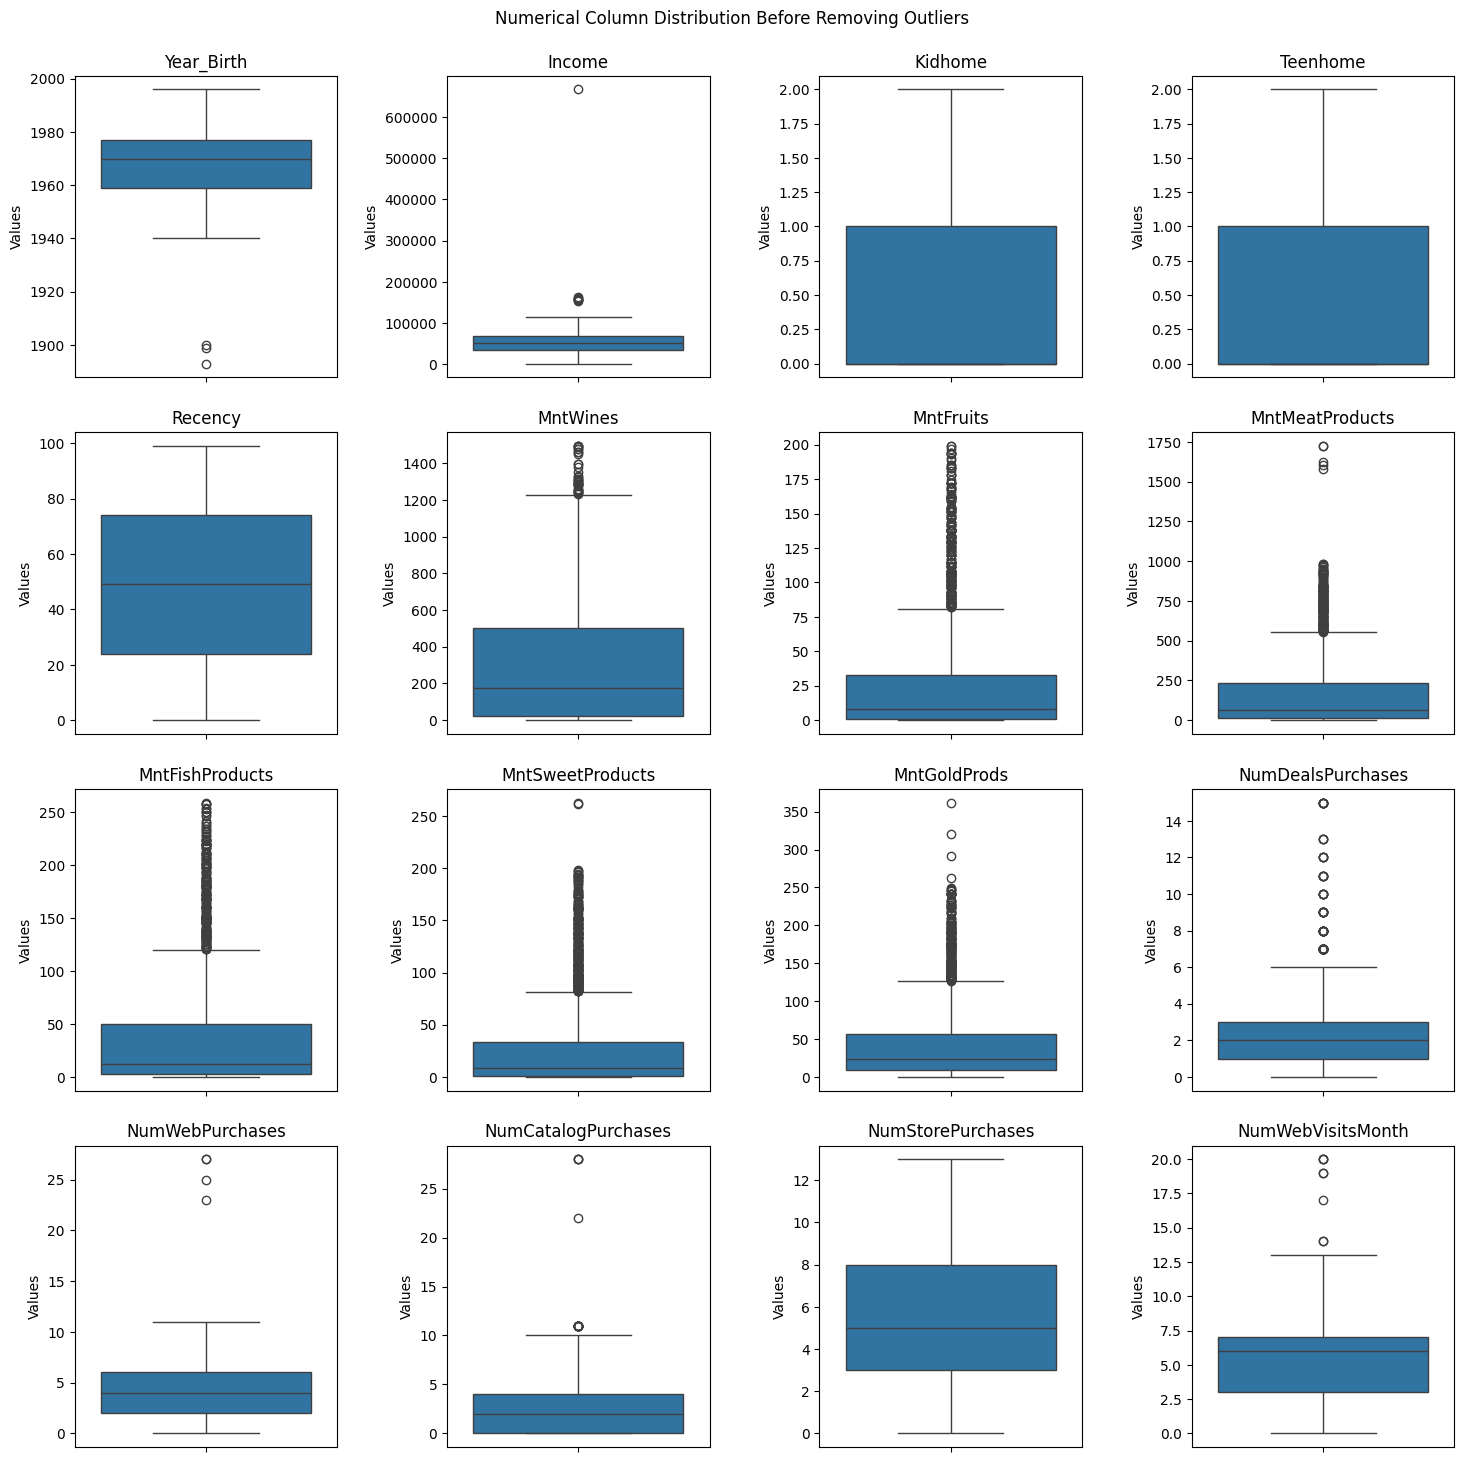

In [ ]:
# numeric columns check
num_col = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def boxplot_num_col(dataset, list_columns, rows, cols, title, figsize=(15,15)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(list_columns):
        sns.boxplot(data=dataset[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_ylabel('Values')

    fig.suptitle(title, fontsize=12)
    plt.tight_layout(pad=2.0)
    plt.show()

boxplot_num_col(df, num_col, 4, 4, 'Numerical Column Distribution Before Removing Outliers')

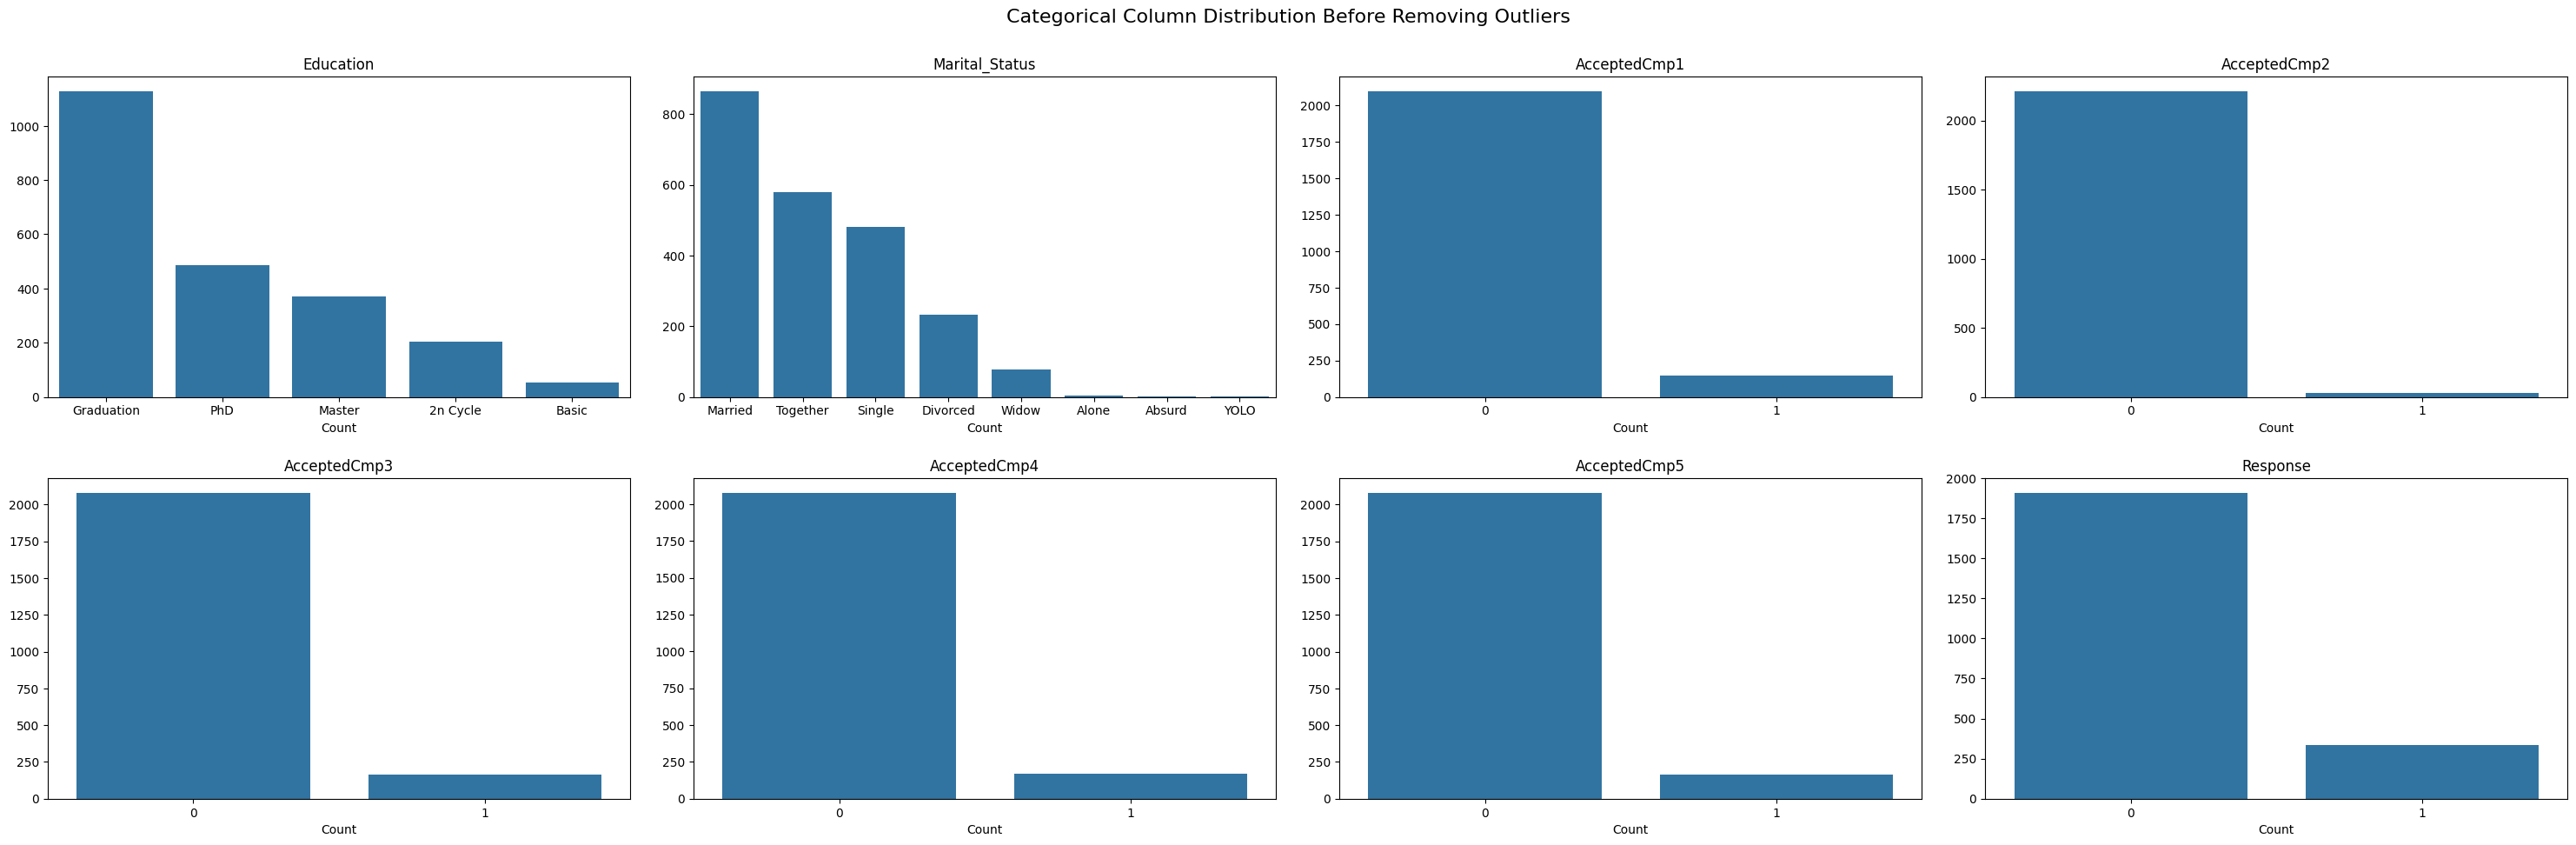

In [ ]:
# categorical columns check

cate_col = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2',
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

def barplot_cate_col(dataset, list_columns, rows, cols, title, figsize=(30, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(list_columns):
        value_counts = dataset[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], estimator='sum')
        axes[i].set_title(col)
        axes[i].set_xlabel('Count')
        axes[i].tick_params(axis='x')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=2.0)
    plt.show()

barplot_cate_col(df, cate_col, 2, 4, 'Categorical Column Distribution Before Removing Outliers')

## **3. Data Cleaning**
### **3.1 Data Type**

In [ ]:
# Dt_Customer contains date time information, thus the expected type is in datetime, not as objcet
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format= '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### **3.2 Duplicate**

In [ ]:
# check duplicate

duplicates = df[df.duplicated()]
if duplicates.empty:
    print("There are no duplicates")
else:
    print(f"duplicates: {duplicates}")

There are no duplicates


### **3.3 Missing Value**

In [ ]:
# check missing values and unique value

missing_value_check = pd.DataFrame({
    "total": df.shape[0],
    "null_count": df.isna().sum(),
    "null_pct": (df.isna().sum() / df.shape[0] * 100).round(2),
    "unique_count": df.nunique(),
    "unique_sample" : [df[col].unique() for col in df.columns]
}).rename_axis('column')
missing_value_check

,total,null_count,null_pct,unique_count,unique_sample
column,,,,,
ID,2240,0,0.00,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
Year_Birth,2240,0,0.00,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
Education,2240,0,0.00,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
Marital_Status,2240,0,0.00,8,"[Single, Together, Married, Divorced, Widow, A..."
Income,2240,24,1.07,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
Kidhome,2240,0,0.00,3,"[0, 1, 2]"
Teenhome,2240,0,0.00,3,"[0, 1, 2]"
Dt_Customer,2240,0,0.00,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201..."
Recency,2240,0,0.00,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."


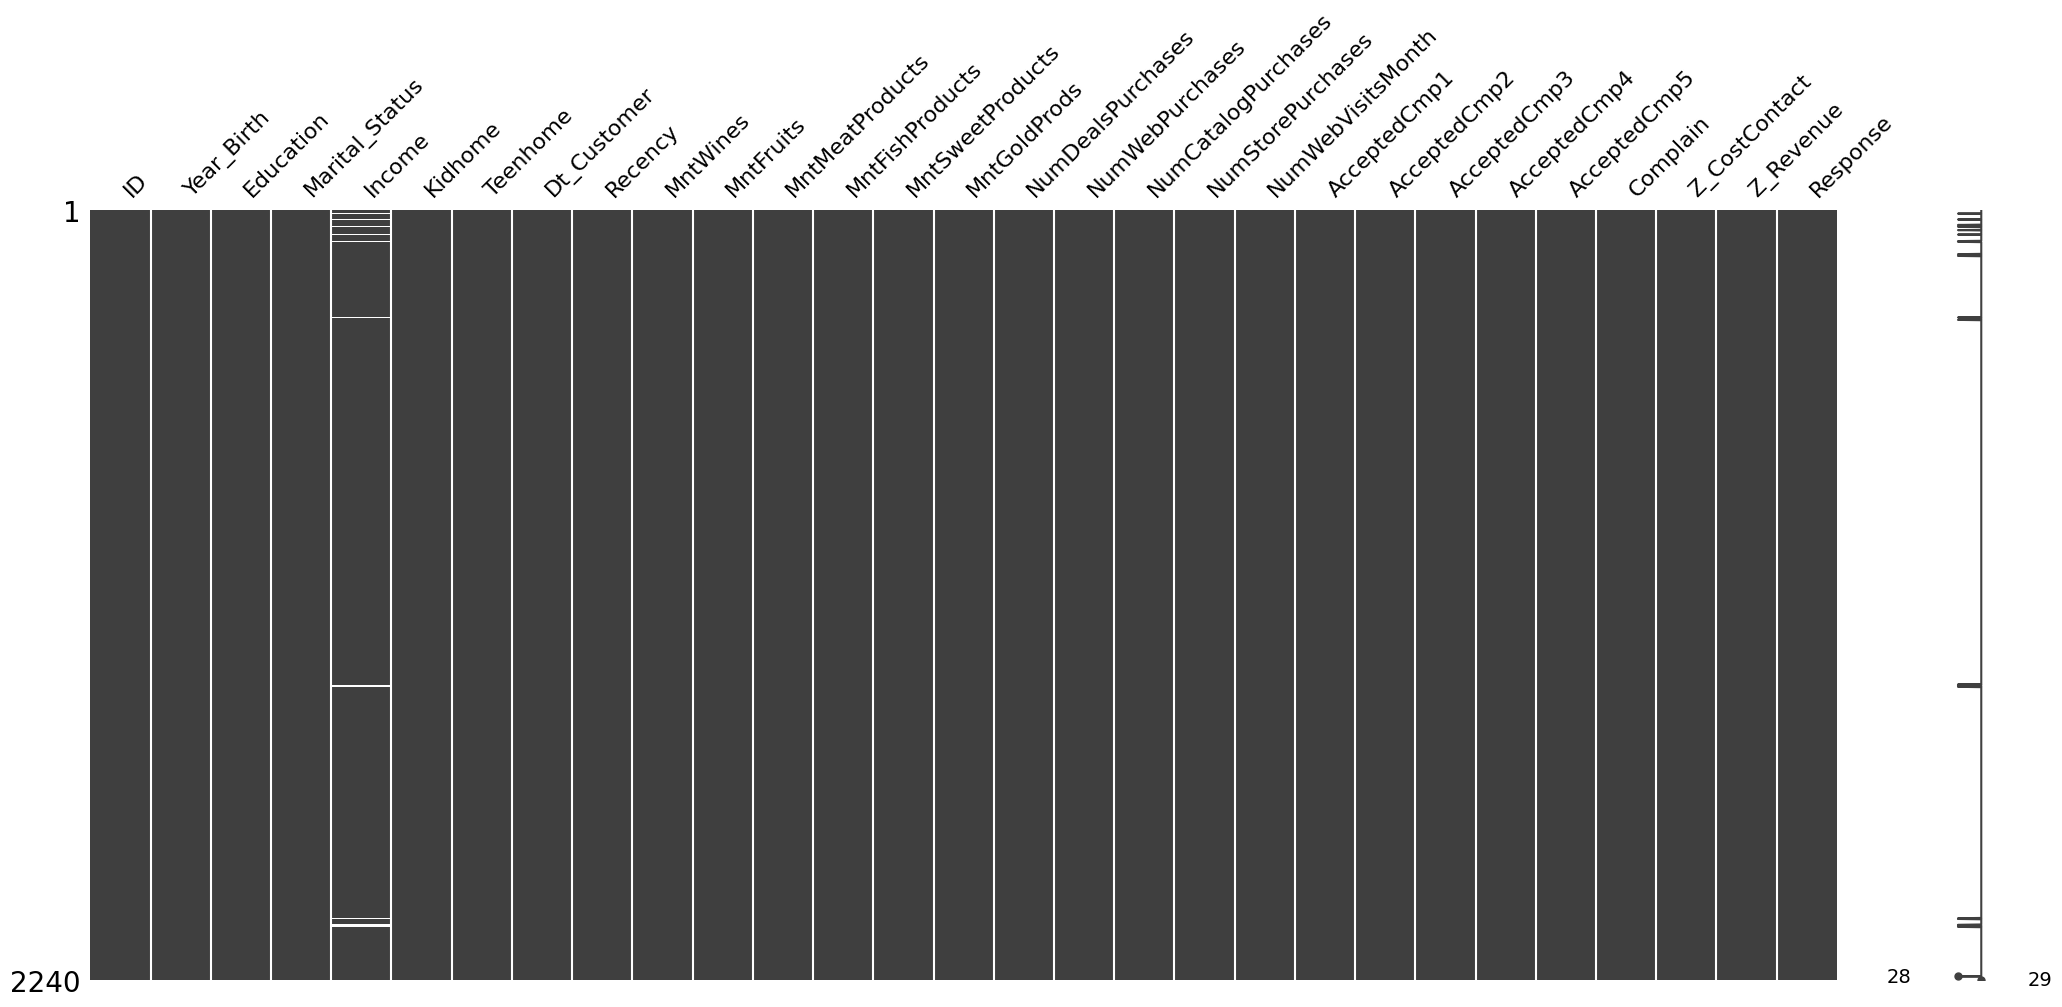

In [ ]:
# check missing values using missingno

import missingno as ms
ms.matrix(df)
plt.show()

- Income merely missing about 1% of total value, imputation is sufficient to be performed

### **3.4 Feature Engineering**

**A. Age**

In [ ]:
# Converts Year_Birth to Age
df.insert(2, 'Age', 2014 - df['Year_Birth'])

# Categorize the age
def age_category(age):
    if age <= 19:
        return 'Teen'
    elif age < 45:
        return 'Adult'
    elif age < 60:
        return 'Middle age'
    else:
        return 'Elderly'

df.insert(3, 'Age_group', df['Age'].apply(age_category))

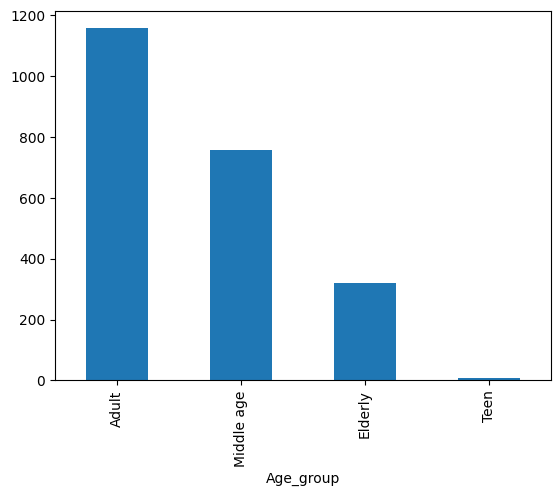

<Figure size 500x500 with 0 Axes>

In [ ]:
df['Age_group'].value_counts().plot(kind='bar')
plt.figure(figsize=(5,5))
plt.show()

**B. Education**

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
# adjust the level of degree
# 2n cycle equal to Master
df['Education'] = df['Education'].replace({'2n Cycle' : 'Master',
                                           'Graduation' : 'Undergraduate',
                                           'Basic' : 'High school',
                                           'PhD' : 'Doctorate'})
df['Education'].unique()

array(['Undergraduate', 'Doctorate', 'Master', 'High school'],
      dtype=object)

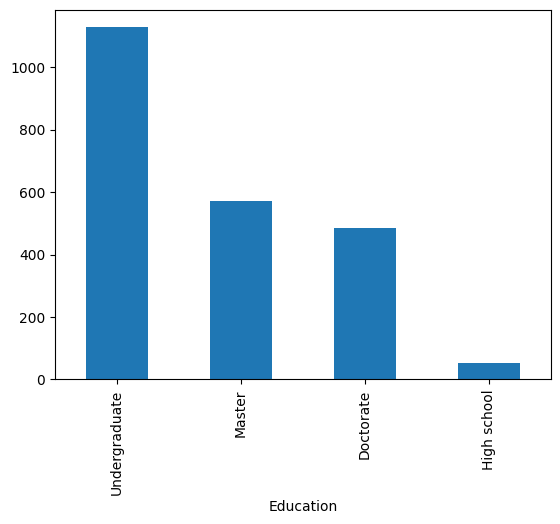

<Figure size 500x500 with 0 Axes>

In [ ]:
df['Education'].value_counts().plot(kind='bar')
plt.figure(figsize=(5,5))
plt.show()

**C. Marital Status**

In [ ]:
df['Marital_Status'].value_counts(normalize=True)

Marital_Status
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: proportion, dtype: float64

In [ ]:
# classify marital status into 2 categories
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

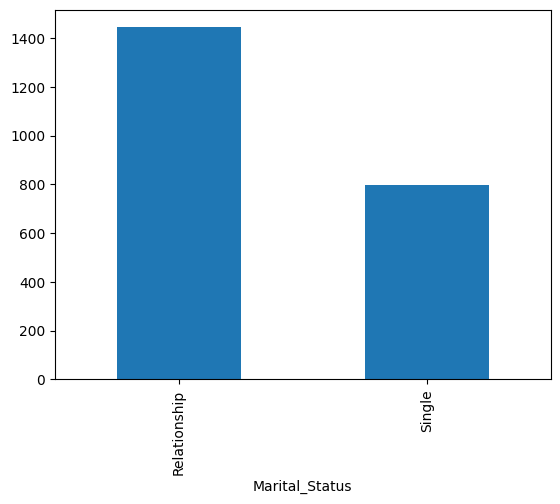

<Figure size 500x500 with 0 Axes>

In [ ]:
df['Marital_Status'].value_counts().plot(kind='bar')
plt.figure(figsize=(5,5))
plt.show()

**D. Children**

In [ ]:
# count the number of children for each customer
df.insert(9, 'Children', df['Kidhome'] + df['Teenhome'])

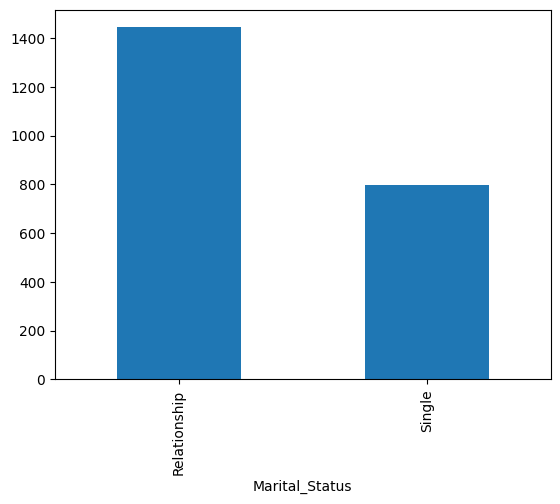

<Figure size 500x500 with 0 Axes>

In [ ]:
df['Marital_Status'].value_counts().plot(kind='bar')
plt.figure(figsize=(5,5))
plt.show()

**E. Income**

In [ ]:
# classify income into 3 classes
def income_classification(income):
    if income <= 35340:
        return 'Low'
    elif income <= 68118:
        return 'Medium'
    else:
        return 'High'

df.insert(7, 'Income_class', df['Income'].apply(income_classification))

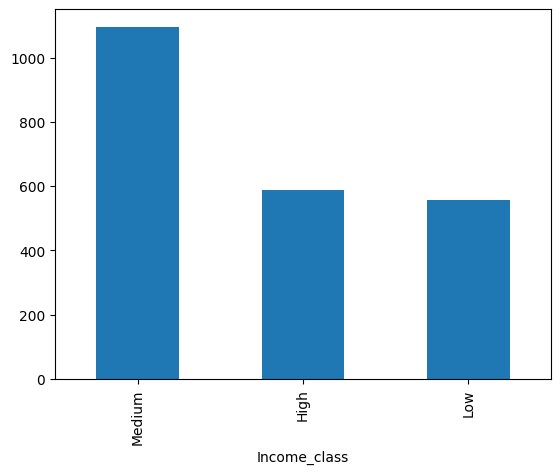

<Figure size 500x500 with 0 Axes>

In [ ]:
df['Income_class'].value_counts().plot(kind='bar')
plt.figure(figsize=(5,5))
plt.show()

**F. Expenses**

In [ ]:
# add aditional features called Expense
df.insert(19, 'Expenses', df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [ ]:
# check DataFrame again
df.head()

,ID,Year_Birth,Age,Age_group,Education,Marital_Status,Income,Income_class,Kidhome,Teenhome,Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Expenses,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Middle age,Undergraduate,Single,58138.0,Medium,0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Elderly,Undergraduate,Single,46344.0,Medium,1,1,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Middle age,Undergraduate,Relationship,71613.0,High,0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Adult,Undergraduate,Relationship,26646.0,Low,1,0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,Adult,Doctorate,Relationship,58293.0,Medium,1,0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **3.5 Handling Outliers**

<Axes: ylabel='Income'>

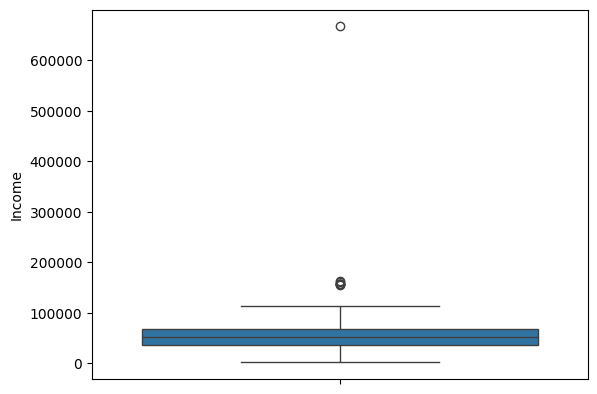

In [ ]:
# remove outliers Income
sns.boxplot(df['Income'])

<Axes: ylabel='Income'>

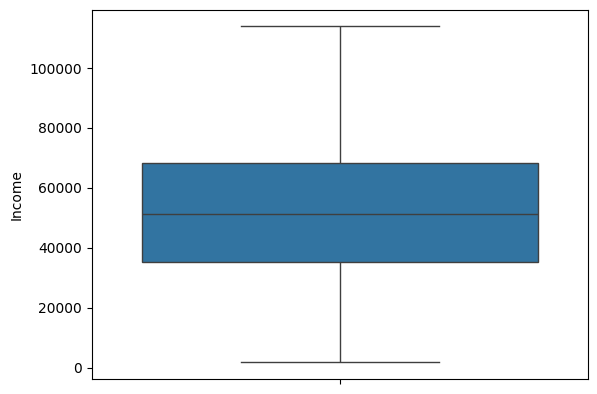

In [ ]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.query(f"Income >= {lower_bound} and Income <= {upper_bound}")

sns.boxplot(df['Income'])

<Axes: ylabel='Age'>

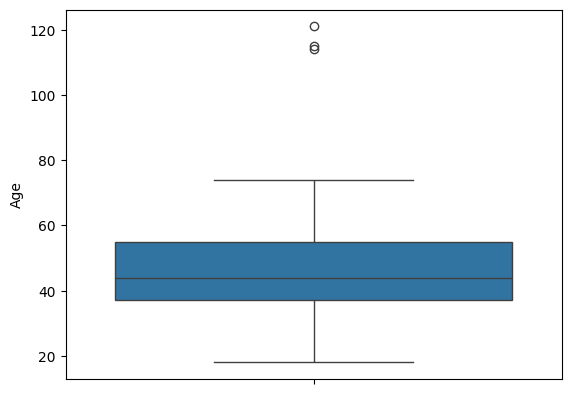

In [ ]:
# remove outliers Age
sns.boxplot(df['Age'])

<Axes: ylabel='Age'>

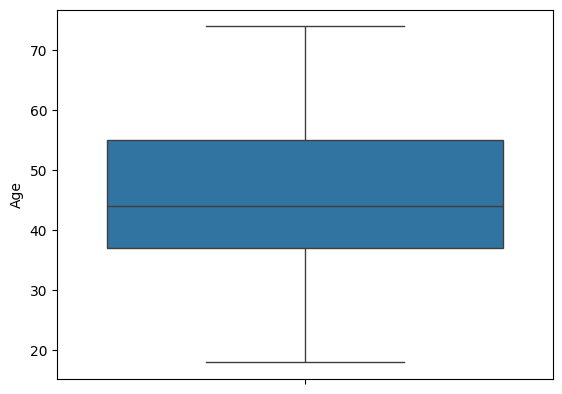

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.query(f"Age >= {lower_bound} and Age <= {upper_bound}")

sns.boxplot(df['Age'])

### **3.6 Drop the Unwanted Features**

In [ ]:
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome', 'Year_Birth', 'Complain'], inplace=True)
df

,ID,Age,Age_group,Education,Marital_Status,Income,Income_class,Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Expenses,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,57,Middle age,Undergraduate,Single,58138.0,Medium,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,1
1,2174,60,Elderly,Undergraduate,Single,46344.0,Medium,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0
2,4141,49,Middle age,Undergraduate,Relationship,71613.0,High,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0
3,6182,30,Adult,Undergraduate,Relationship,26646.0,Low,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0
4,5324,33,Adult,Doctorate,Relationship,58293.0,Medium,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Middle age,Undergraduate,Relationship,61223.0,Medium,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,0,0,0,0,0,0
2236,4001,68,Elderly,Doctorate,Relationship,64014.0,Medium,3,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,7,1,0,0,0,0,0
2237,7270,33,Adult,Undergraduate,Single,56981.0,Medium,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,0,0,0,1,0,0
2238,8235,58,Middle age,Master,Relationship,69245.0,High,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Age                  2205 non-null   int64         
 2   Age_group            2205 non-null   object        
 3   Education            2205 non-null   object        
 4   Marital_Status       2205 non-null   object        
 5   Income               2205 non-null   float64       
 6   Income_class         2205 non-null   object        
 7   Children             2205 non-null   int64         
 8   Dt_Customer          2205 non-null   datetime64[ns]
 9   Recency              2205 non-null   int64         
 10  MntWines             2205 non-null   int64         
 11  MntFruits            2205 non-null   int64         
 12  MntMeatProducts      2205 non-null   int64         
 13  MntFishProducts      2205 non-null   i

## **4. Initial EDA**

In [ ]:
product_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
method_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

**Univariate analysis**

1. Categorical variable

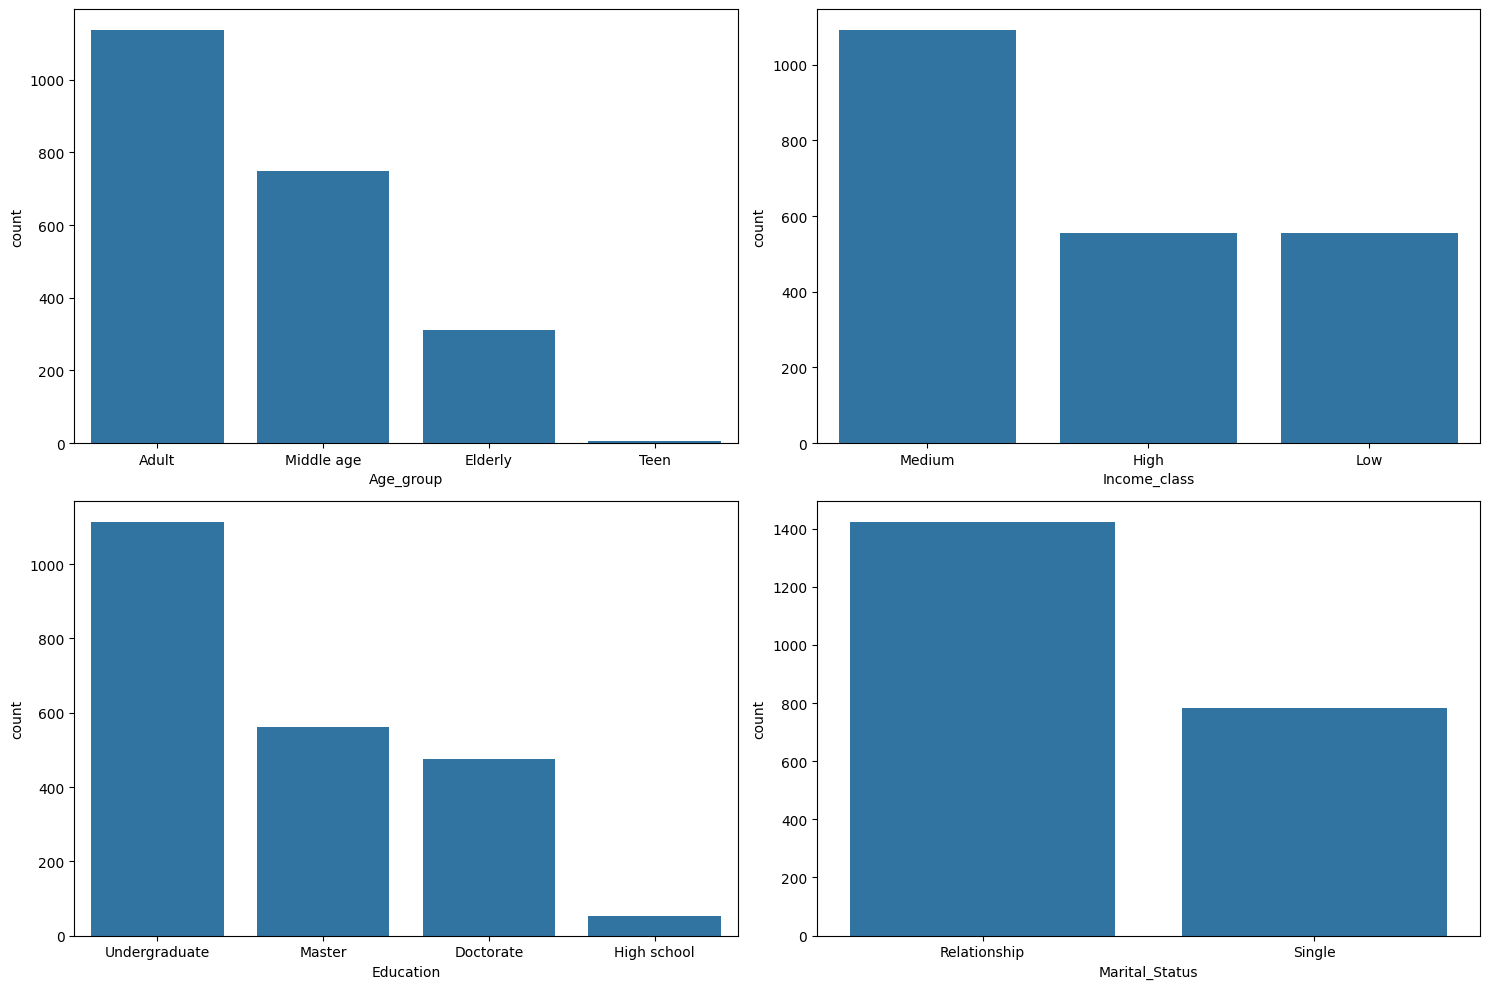

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Age_group',
              data=df,
              ax=axes[0, 0],
              order=df['Age_group'].value_counts().index)

sns.countplot(x='Income_class',
              data=df,
              ax=axes[0, 1],
              order=df['Income_class'].value_counts().index)

sns.countplot(x='Education',
              data=df,
              ax=axes[1, 0],
              order=df['Education'].value_counts().index)

sns.countplot(x='Marital_Status',
              data=df,
              ax=axes[1, 1],
              order=df['Marital_Status'].value_counts().index)

plt.tight_layout()
plt.show()

2. Numerical variable

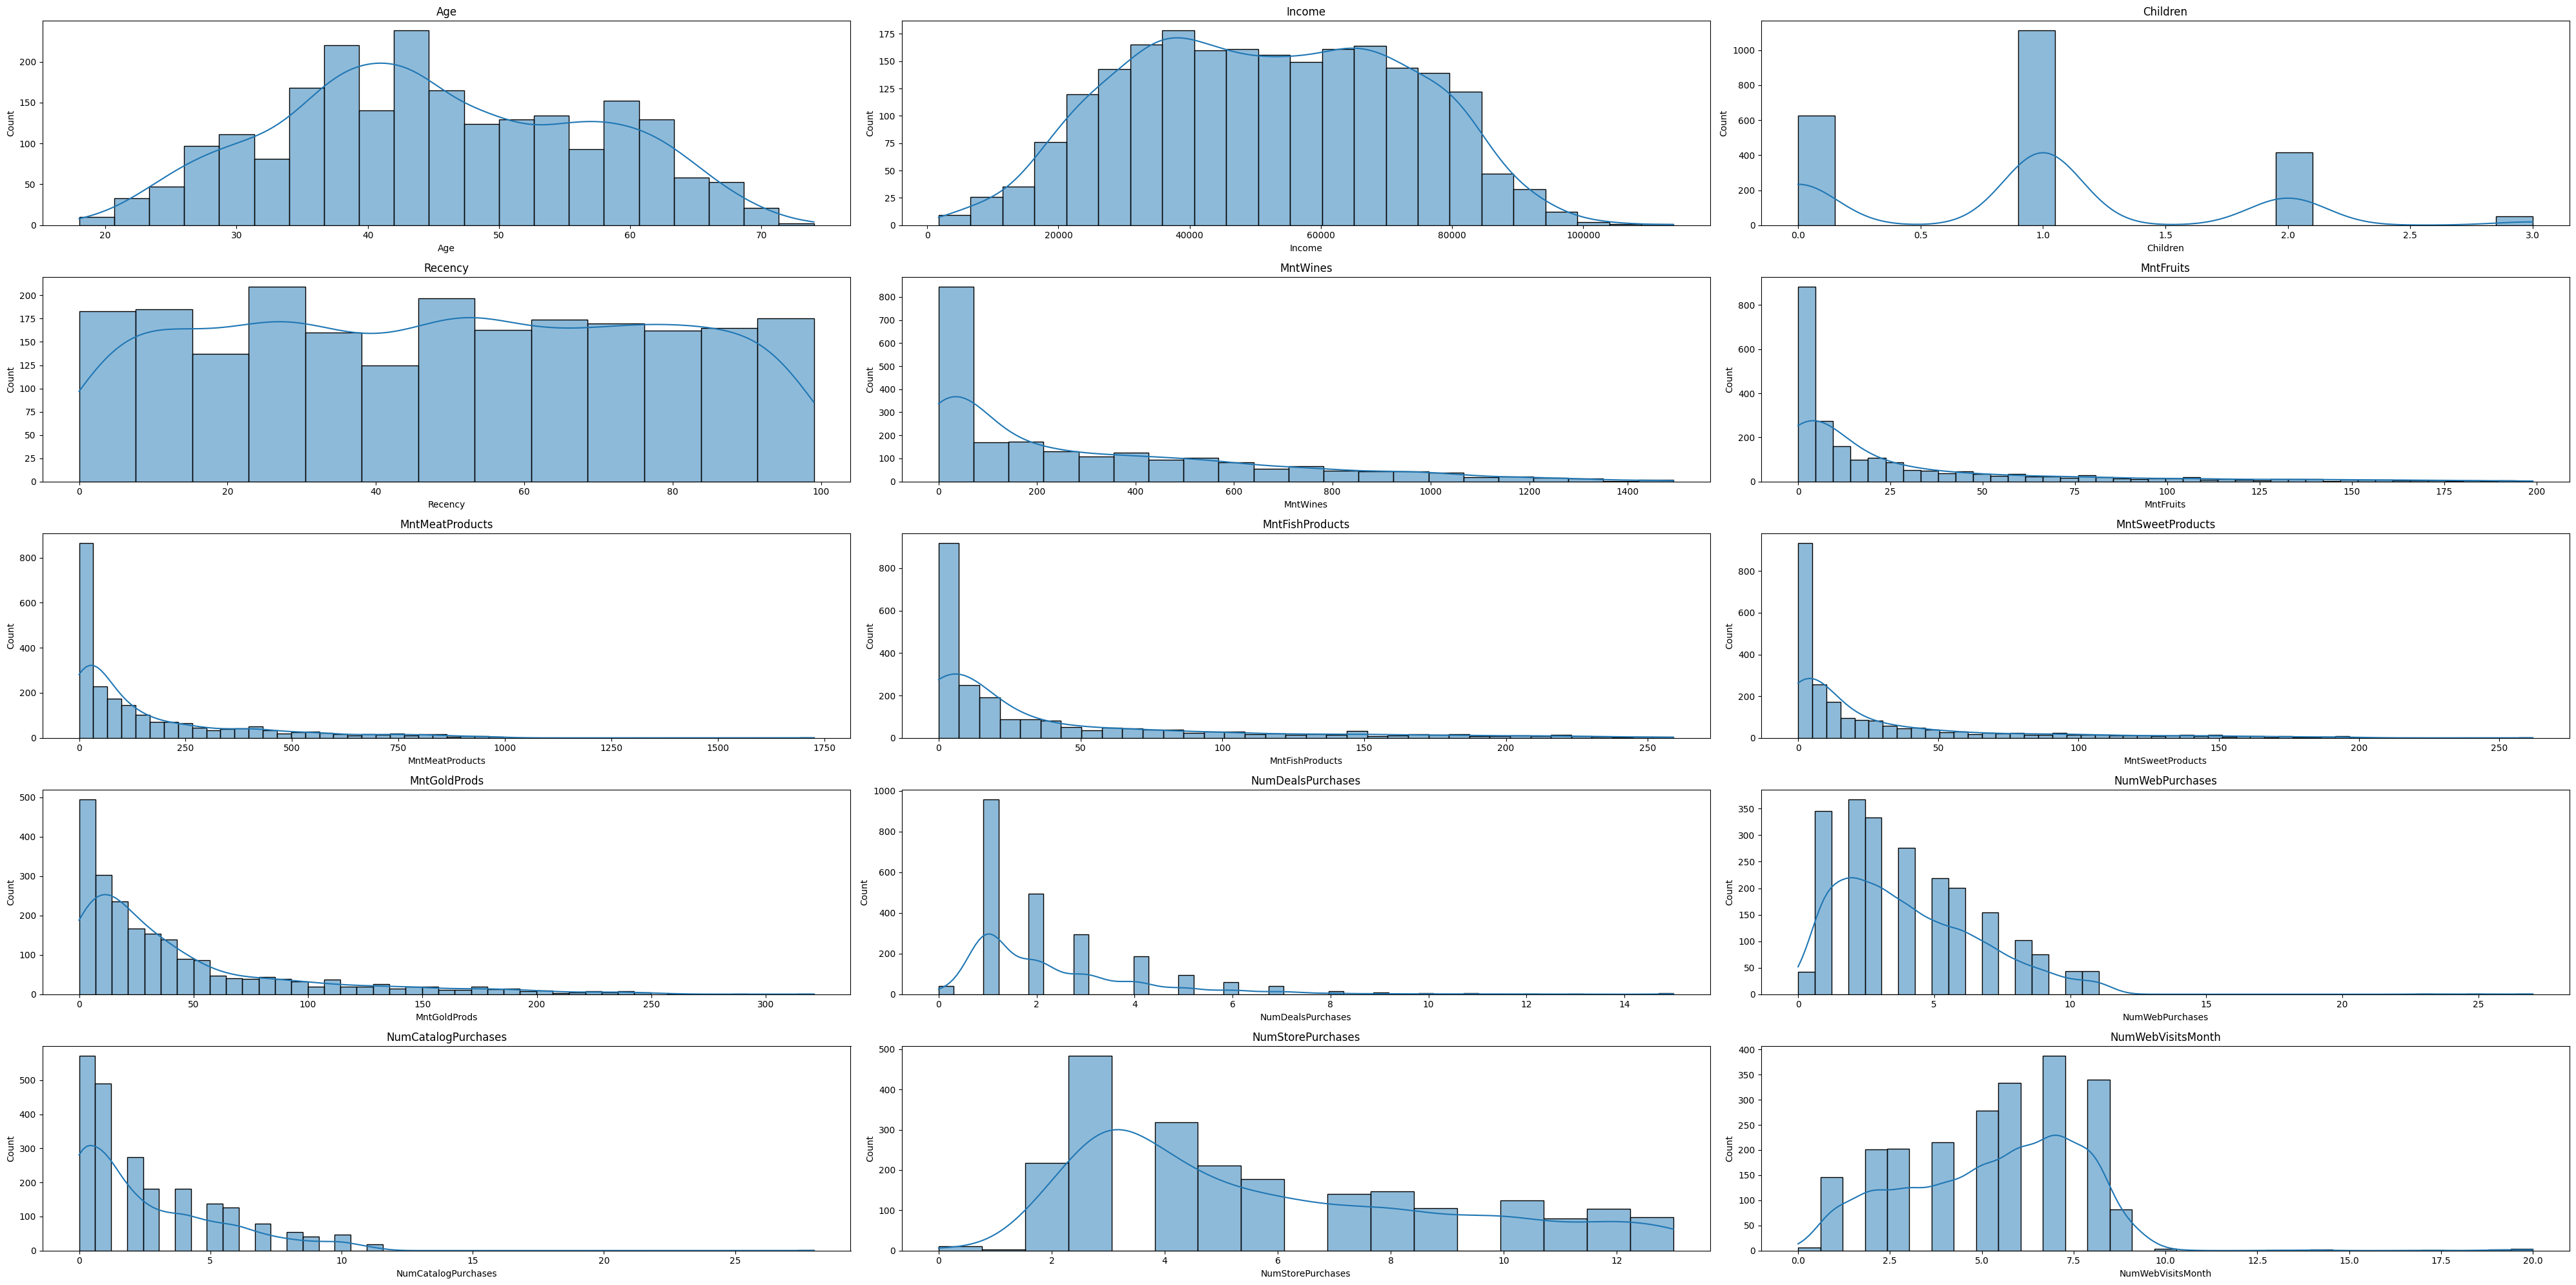

In [ ]:
cols = [
    'Age', 'Income', 'Children', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

fig, axes = plt.subplots(5, 3, figsize=(40, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**Bivariate analysis**

**1. Product**

Income

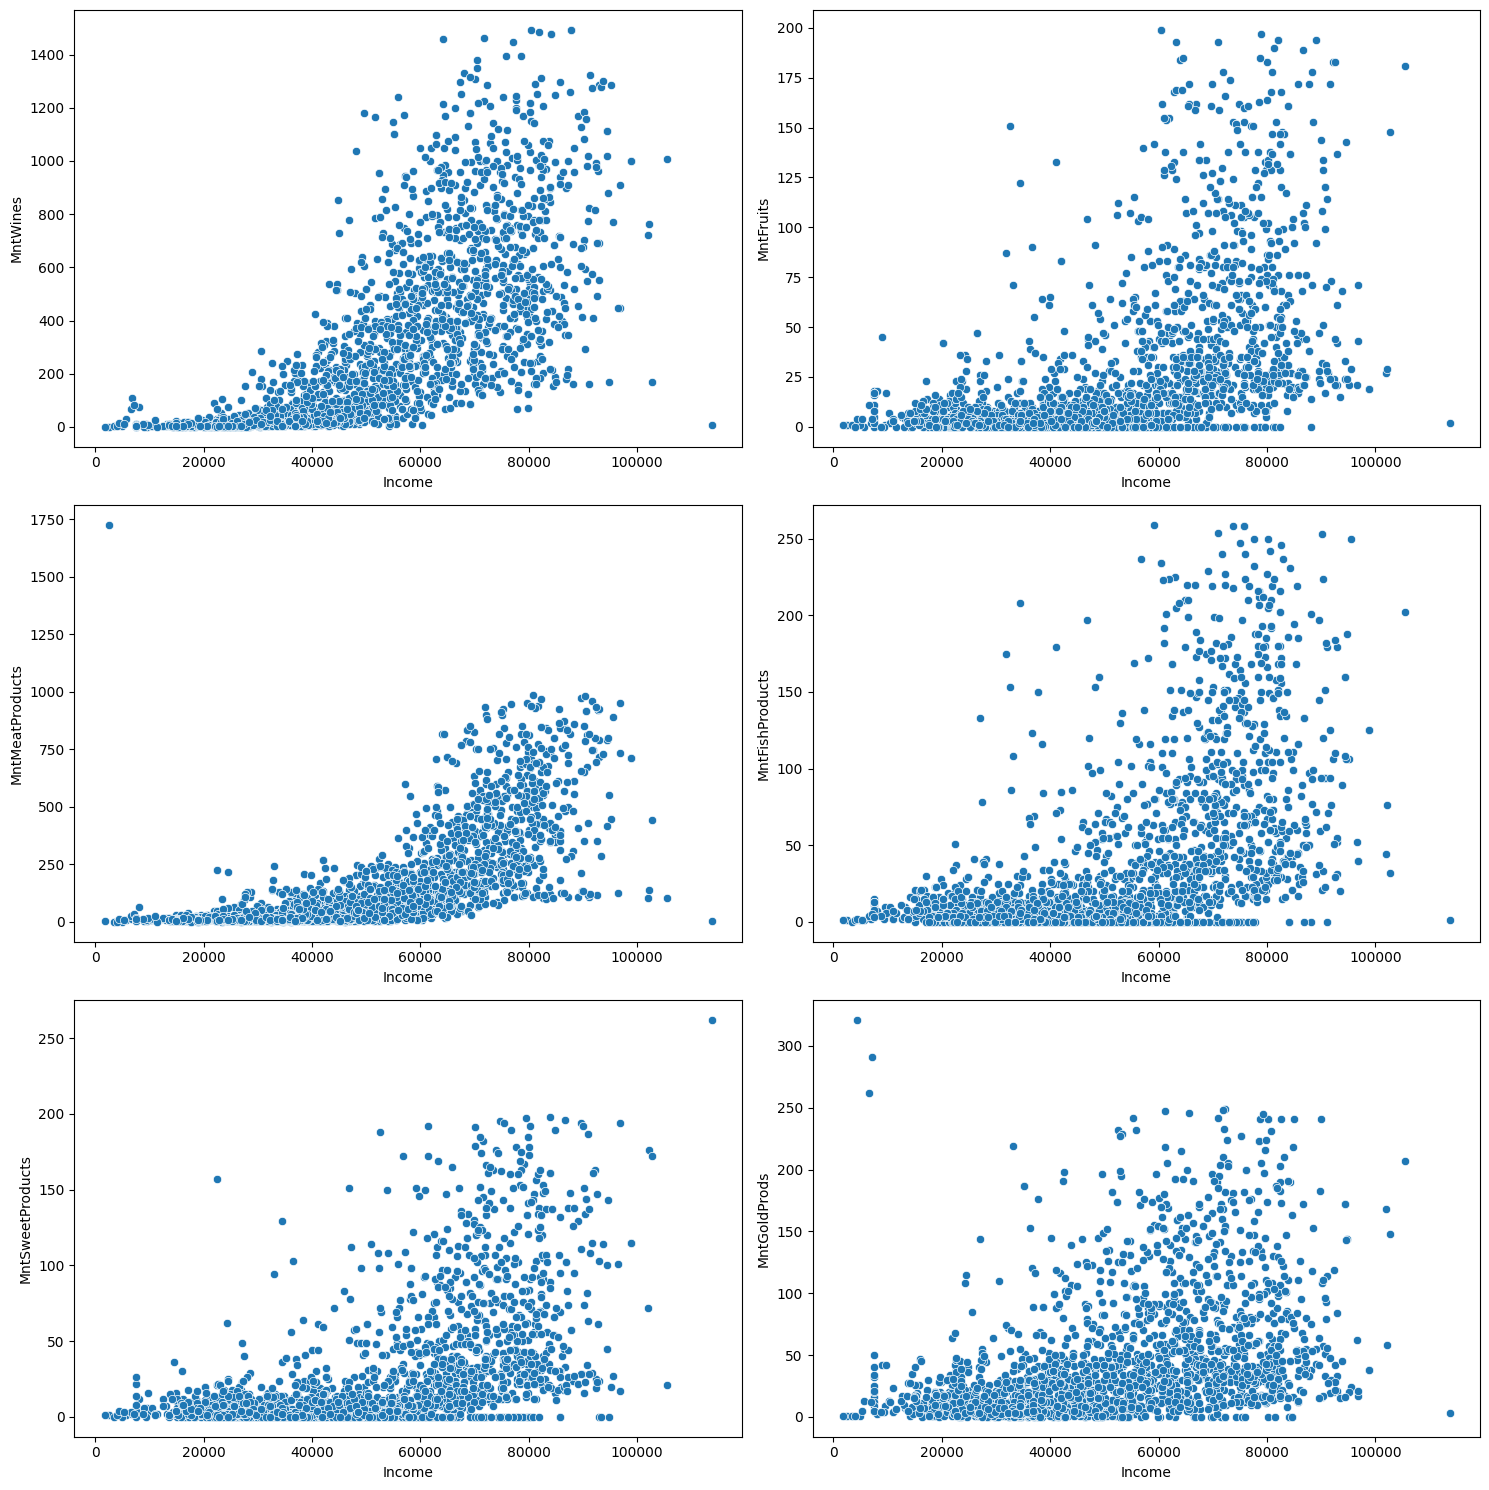

In [ ]:
# relationship between amount spent per productt
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.scatterplot(x='Income', y='MntWines',
                data=df,
                ax=axes[0, 0])

sns.scatterplot(x='Income', y='MntFruits',
                data=df,
                ax=axes[0, 1])

sns.scatterplot(x='Income', y='MntMeatProducts',
                data=df,
                ax=axes[1, 0])

sns.scatterplot(x='Income', y='MntFishProducts',
                data=df,
                ax=axes[1, 1])

sns.scatterplot(x='Income', y='MntSweetProducts',
                data=df,
                ax=axes[2, 0])

sns.scatterplot(x='Income', y='MntGoldProds',
                data=df,
                ax=axes[2, 1])

plt.tight_layout()
plt.show()

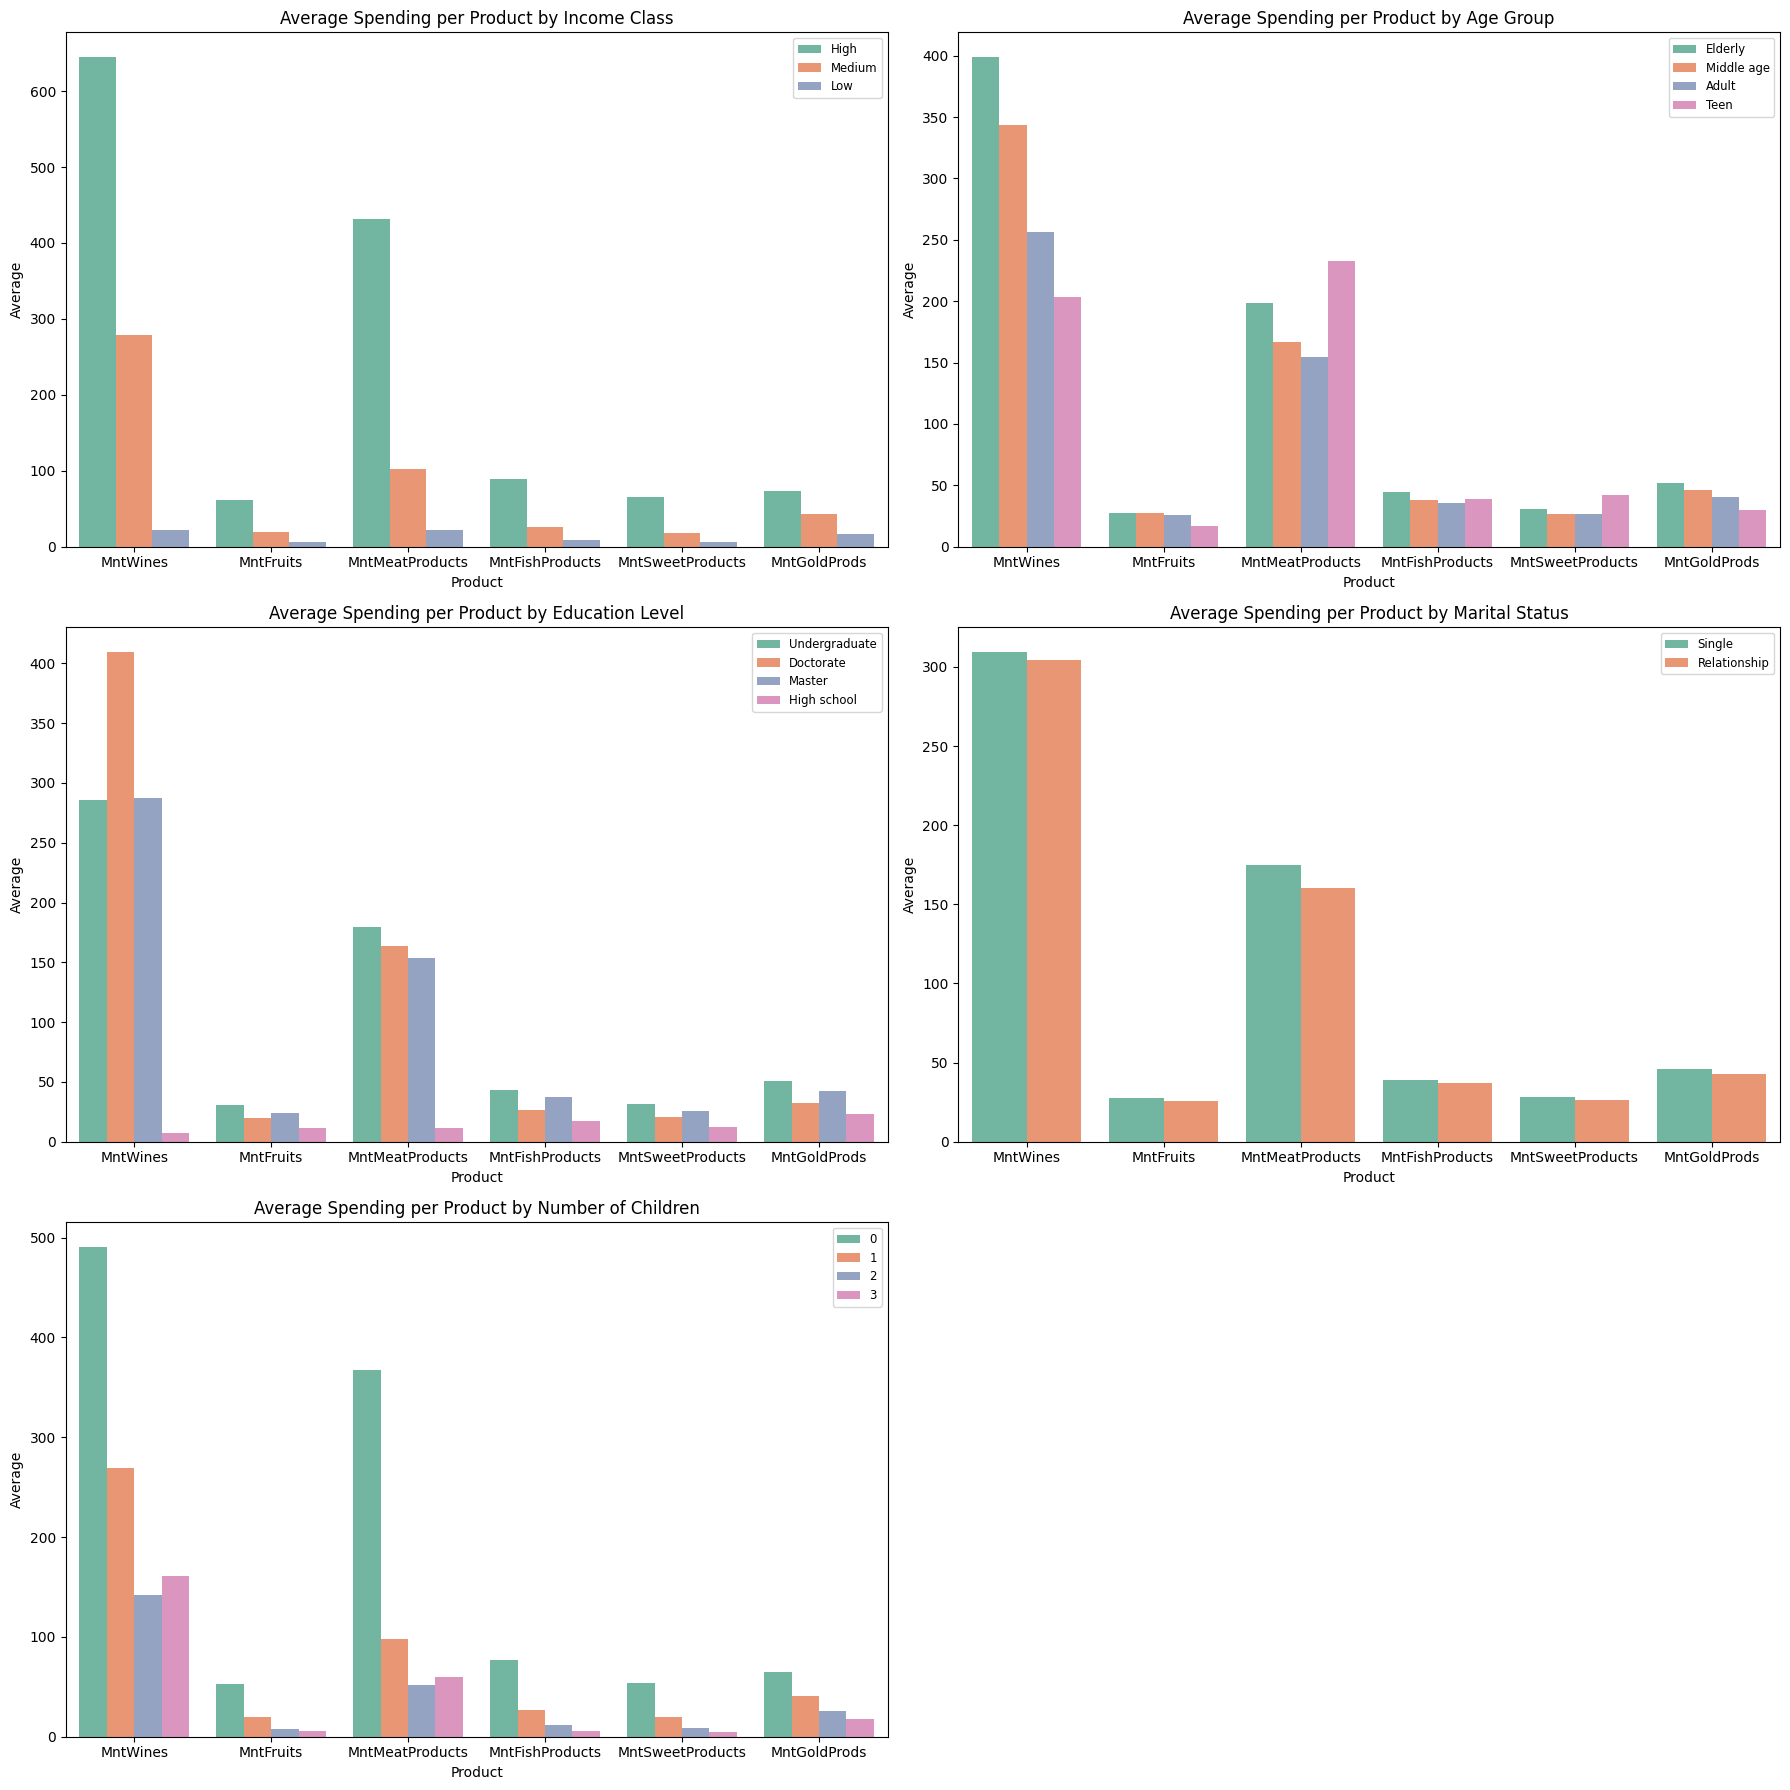

In [ ]:
# average spending per product for each demographic category
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot 1: Income_class
df_long = df.melt(id_vars=['Income_class'], value_vars=product_cols, var_name='Product', value_name='Average')
sns.barplot(data=df_long, x='Product', y='Average', hue='Income_class',
            ci=None, hue_order=['High', 'Medium', 'Low'], palette='Set2', ax=axes[0,0])
axes[0,0].set_title('Average Spending per Product by Income Class')
axes[0,0].legend(loc='upper right', fontsize='small')

# Plot 2: Age_group
df_long = df.melt(id_vars=['Age_group'], value_vars=product_cols, var_name='Product', value_name='Average')
sns.barplot(data=df_long, x='Product', y='Average', hue='Age_group',
            ci=None, hue_order=['Elderly', 'Middle age', 'Adult', 'Teen'], palette='Set2', ax=axes[0,1])
axes[0,1].set_title('Average Spending per Product by Age Group')
axes[0,1].legend(loc='upper right', fontsize='small')

# Plot 3: Education
df_long = df.melt(id_vars=['Education'], value_vars=product_cols, var_name='Product', value_name='Average')
sns.barplot(data=df_long, x='Product', y='Average', hue='Education',
            ci=None, palette='Set2', ax=axes[1,0])
axes[1,0].set_title('Average Spending per Product by Education Level')
axes[1,0].legend(loc='upper right', fontsize='small')

# Plot 4: Marital_Status
df_long = df.melt(id_vars=['Marital_Status'], value_vars=product_cols, var_name='Product', value_name='Average')
sns.barplot(data=df_long, x='Product', y='Average', hue='Marital_Status',
            ci=None, palette='Set2', ax=axes[1,1])
axes[1,1].set_title('Average Spending per Product by Marital Status')
axes[1,1].legend(loc='upper right', fontsize='small')

# Plot 5: Children
df_long = df.melt(id_vars=['Children'], value_vars=product_cols, var_name='Product', value_name='Average')
sns.barplot(data=df_long, x='Product', y='Average', hue='Children',
            ci=None, palette='Set2', ax=axes[2,0])
axes[2,0].set_title('Average Spending per Product by Number of Children')
axes[2,0].legend(loc='upper right', fontsize='small')

# Hapus subplot kosong di posisi (2,1)
fig.delaxes(axes[2,1])

plt.tight_layout()
plt.show()

**2. Purchase Method/channel**

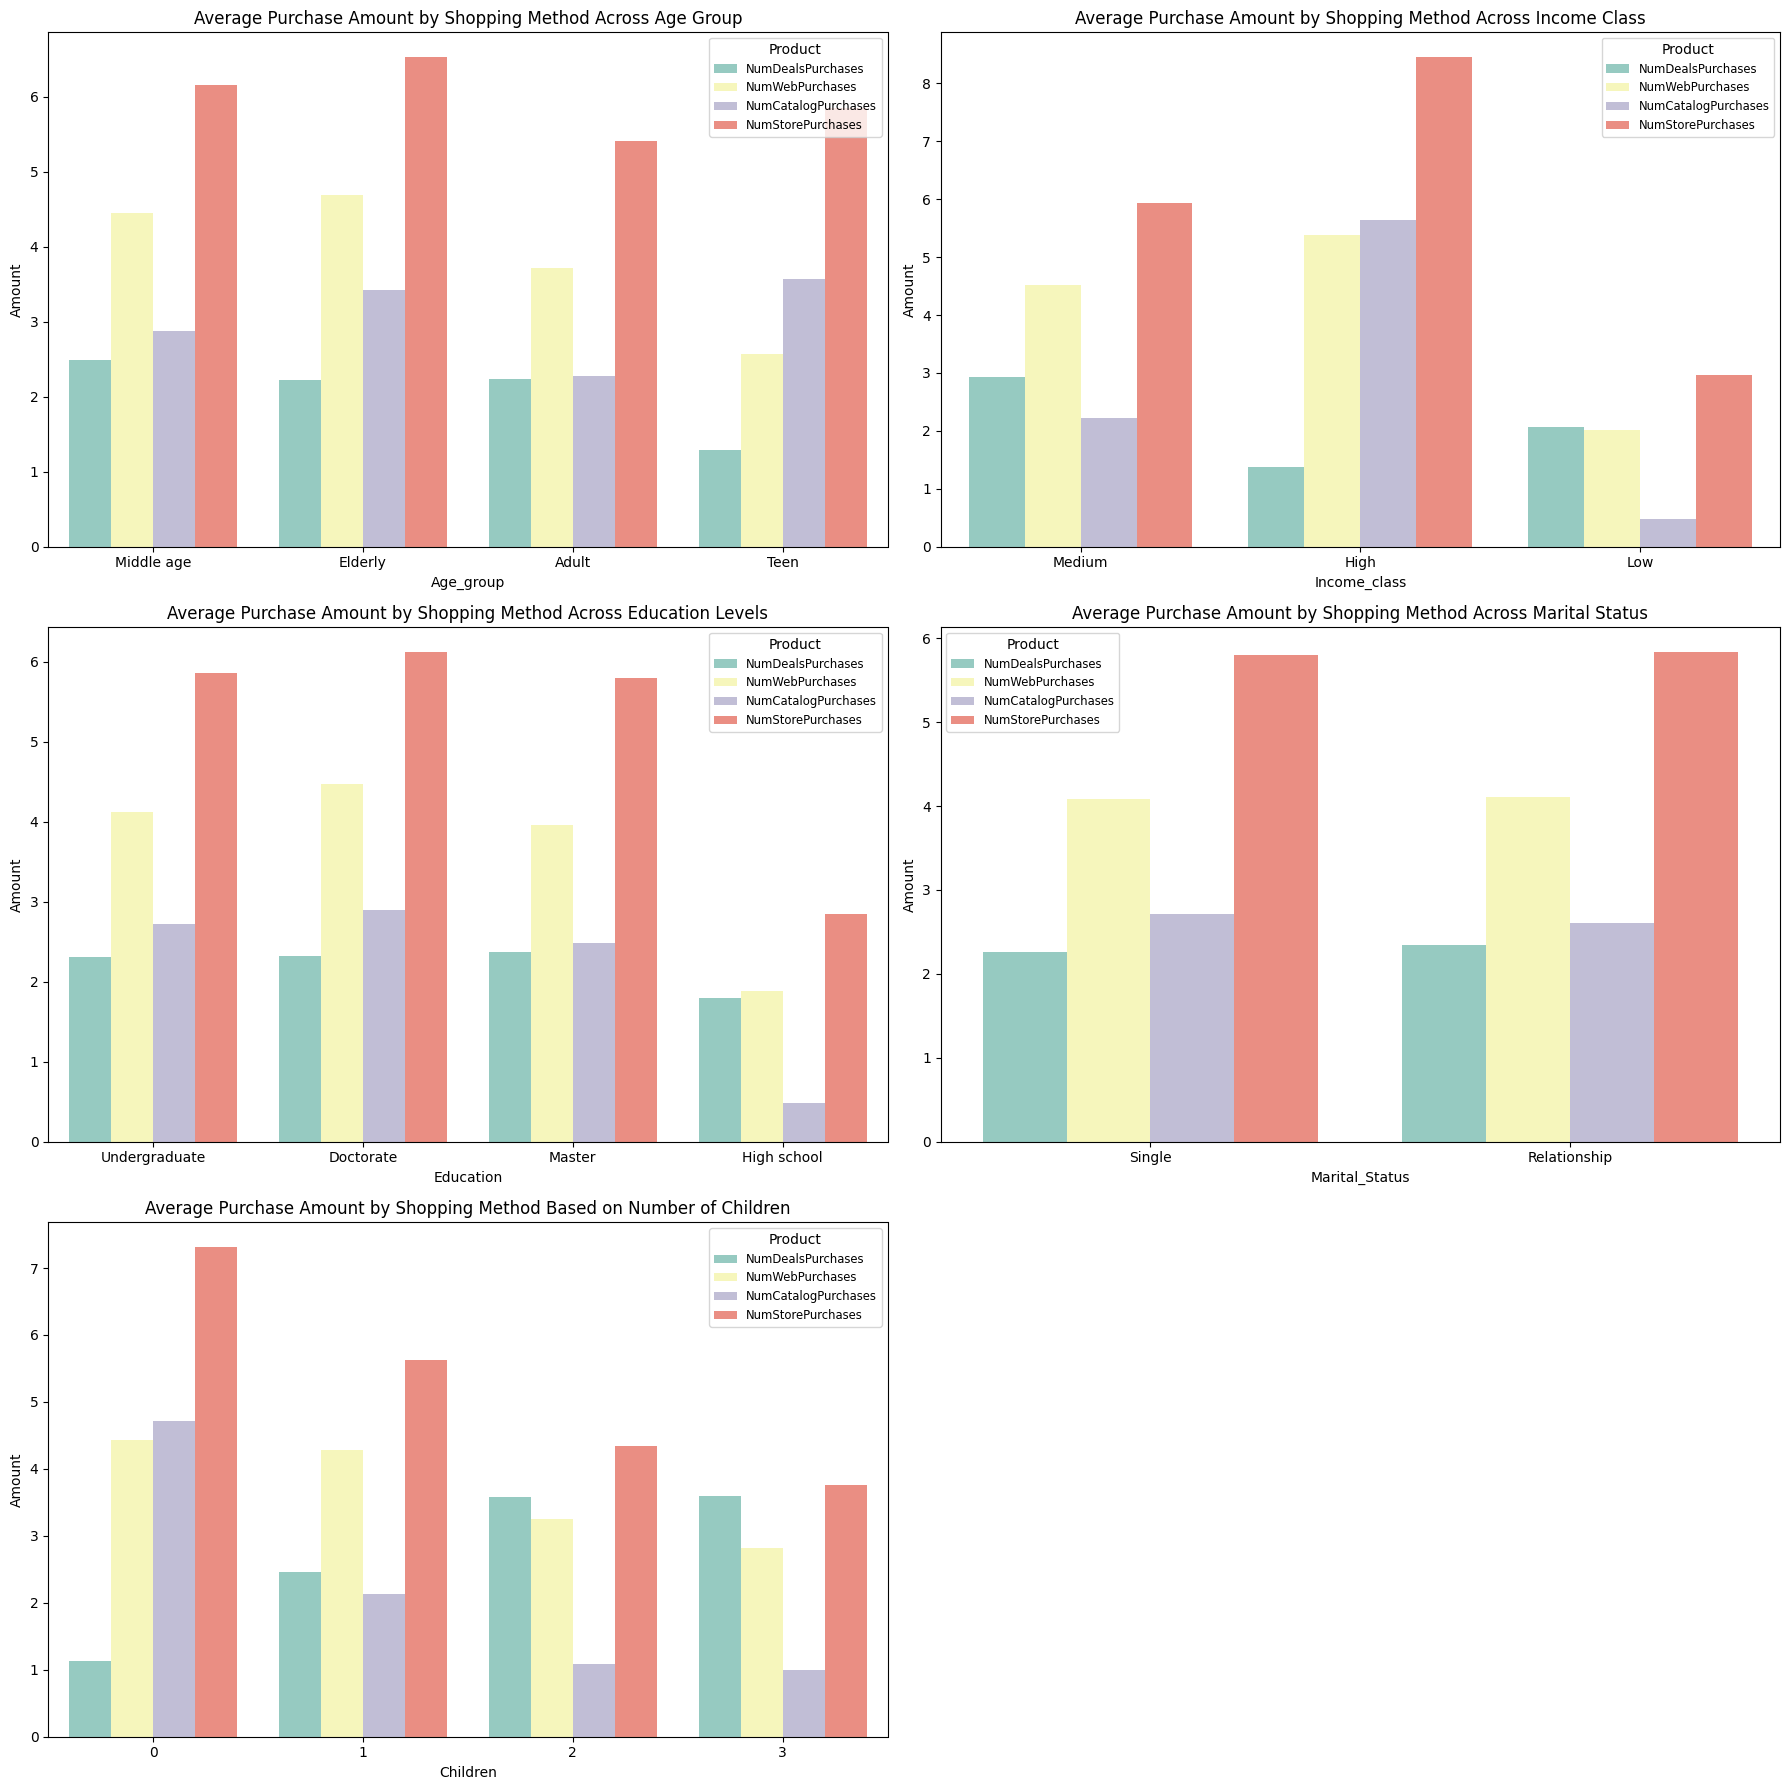

In [ ]:
# average pruchase channel for each demographic variable
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

# 1. Age_group
df_melted = df.melt(id_vars='Age_group',
                    value_vars=method_cols,
                    var_name='Shopping Method',
                    value_name='Amount')
sns.barplot(data=df_melted, x='Age_group', y='Amount',
            hue='Shopping Method', palette='Set3',
            ci=None, ax=axes[0])
axes[0].set_title('Average Purchase Amount by Shopping Method Across Age Group')
axes[0].legend(title='Product', fontsize='small')

# 2. Income_class
df_melted = df.melt(id_vars='Income_class',
                    value_vars=method_cols,
                    var_name='Shopping Method',
                    value_name='Amount')
sns.barplot(data=df_melted, x='Income_class', y='Amount',
            hue='Shopping Method', palette='Set3',
            ci=None, ax=axes[1])
axes[1].set_title('Average Purchase Amount by Shopping Method Across Income Class')
axes[1].legend(title='Product', fontsize='small')

# 3. Education
df_melted = df.melt(id_vars='Education',
                    value_vars=method_cols,
                    var_name='Shopping Method',
                    value_name='Amount')
sns.barplot(data=df_melted, x='Education', y='Amount',
            hue='Shopping Method', palette='Set3',
            ci=None, ax=axes[2])
axes[2].set_title('Average Purchase Amount by Shopping Method Across Education Levels')
axes[2].legend(title='Product', fontsize='small')

# 4. Marital_Status
df_melted = df.melt(id_vars='Marital_Status',
                    value_vars=method_cols,
                    var_name='Shopping Method',
                    value_name='Amount')
sns.barplot(data=df_melted, x='Marital_Status', y='Amount',
            hue='Shopping Method', palette='Set3',
            ci=None, ax=axes[3])
axes[3].set_title('Average Purchase Amount by Shopping Method Across Marital Status')
axes[3].legend(title='Product', fontsize='small')

# 5. Children
df_melted = df.melt(id_vars='Children',
                    value_vars=method_cols,
                    var_name='Shopping Method',
                    value_name='Amount')
sns.barplot(data=df_melted, x='Children', y='Amount',
            hue='Shopping Method', palette='Set3',
            ci=None, ax=axes[4])
axes[4].set_title('Average Purchase Amount by Shopping Method Based on Number of Children')
axes[4].legend(title='Product', fontsize='small')

# Hapus subplot kosong (posisi ke-6)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

**3. Promotion**

In [ ]:
# total accepted campaign for each demographic
display(
    df.groupby('Age_group')[campaign_cols].sum(),
    df.groupby('Education')[campaign_cols].sum() ,
    df.groupby('Income_class')[campaign_cols].sum(),
    df.groupby('Children')[campaign_cols].sum()
        )

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Age_group,,,,,,
Adult,70,13,101,64,86,184
Elderly,25,2,19,28,30,49
Middle age,47,15,41,72,44,98
Teen,0,0,2,0,1,2


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Education,,,,,,
Doctorate,30,10,40,45,38,101
High school,0,0,6,0,0,2
Master,32,4,39,40,37,78
Undergraduate,80,16,78,79,86,152


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Income_class,,,,,,
High,121,16,43,78,152,151
Low,0,0,43,1,0,58
Medium,21,14,77,85,9,124


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Children,,,,,,
0,109,18,48,67,136,168
1,27,9,85,79,21,116
2,4,3,29,16,3,47
3,2,0,1,2,1,2


Response        15.102041
AcceptedCmp4     7.437642
AcceptedCmp3     7.392290
AcceptedCmp5     7.301587
AcceptedCmp1     6.439909
AcceptedCmp2     1.360544
dtype: float64

<Axes: ylabel='None'>

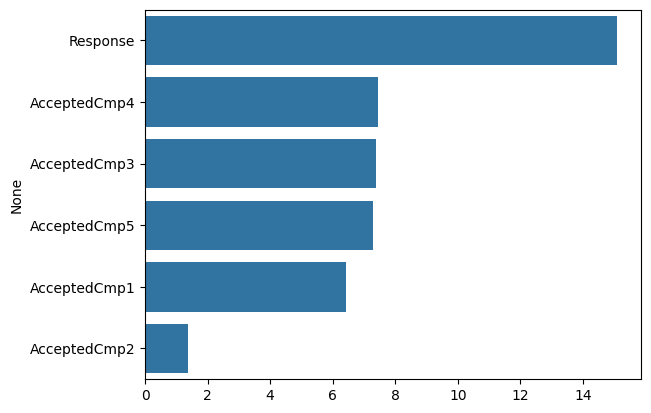

In [ ]:
# accpetance rate from first until last campaign
acceptance_rate = df[campaign_cols].mean().sort_values(ascending=False) * 100
display(
    acceptance_rate,
    sns.barplot(x=acceptance_rate.values,
            y=acceptance_rate.index)
)

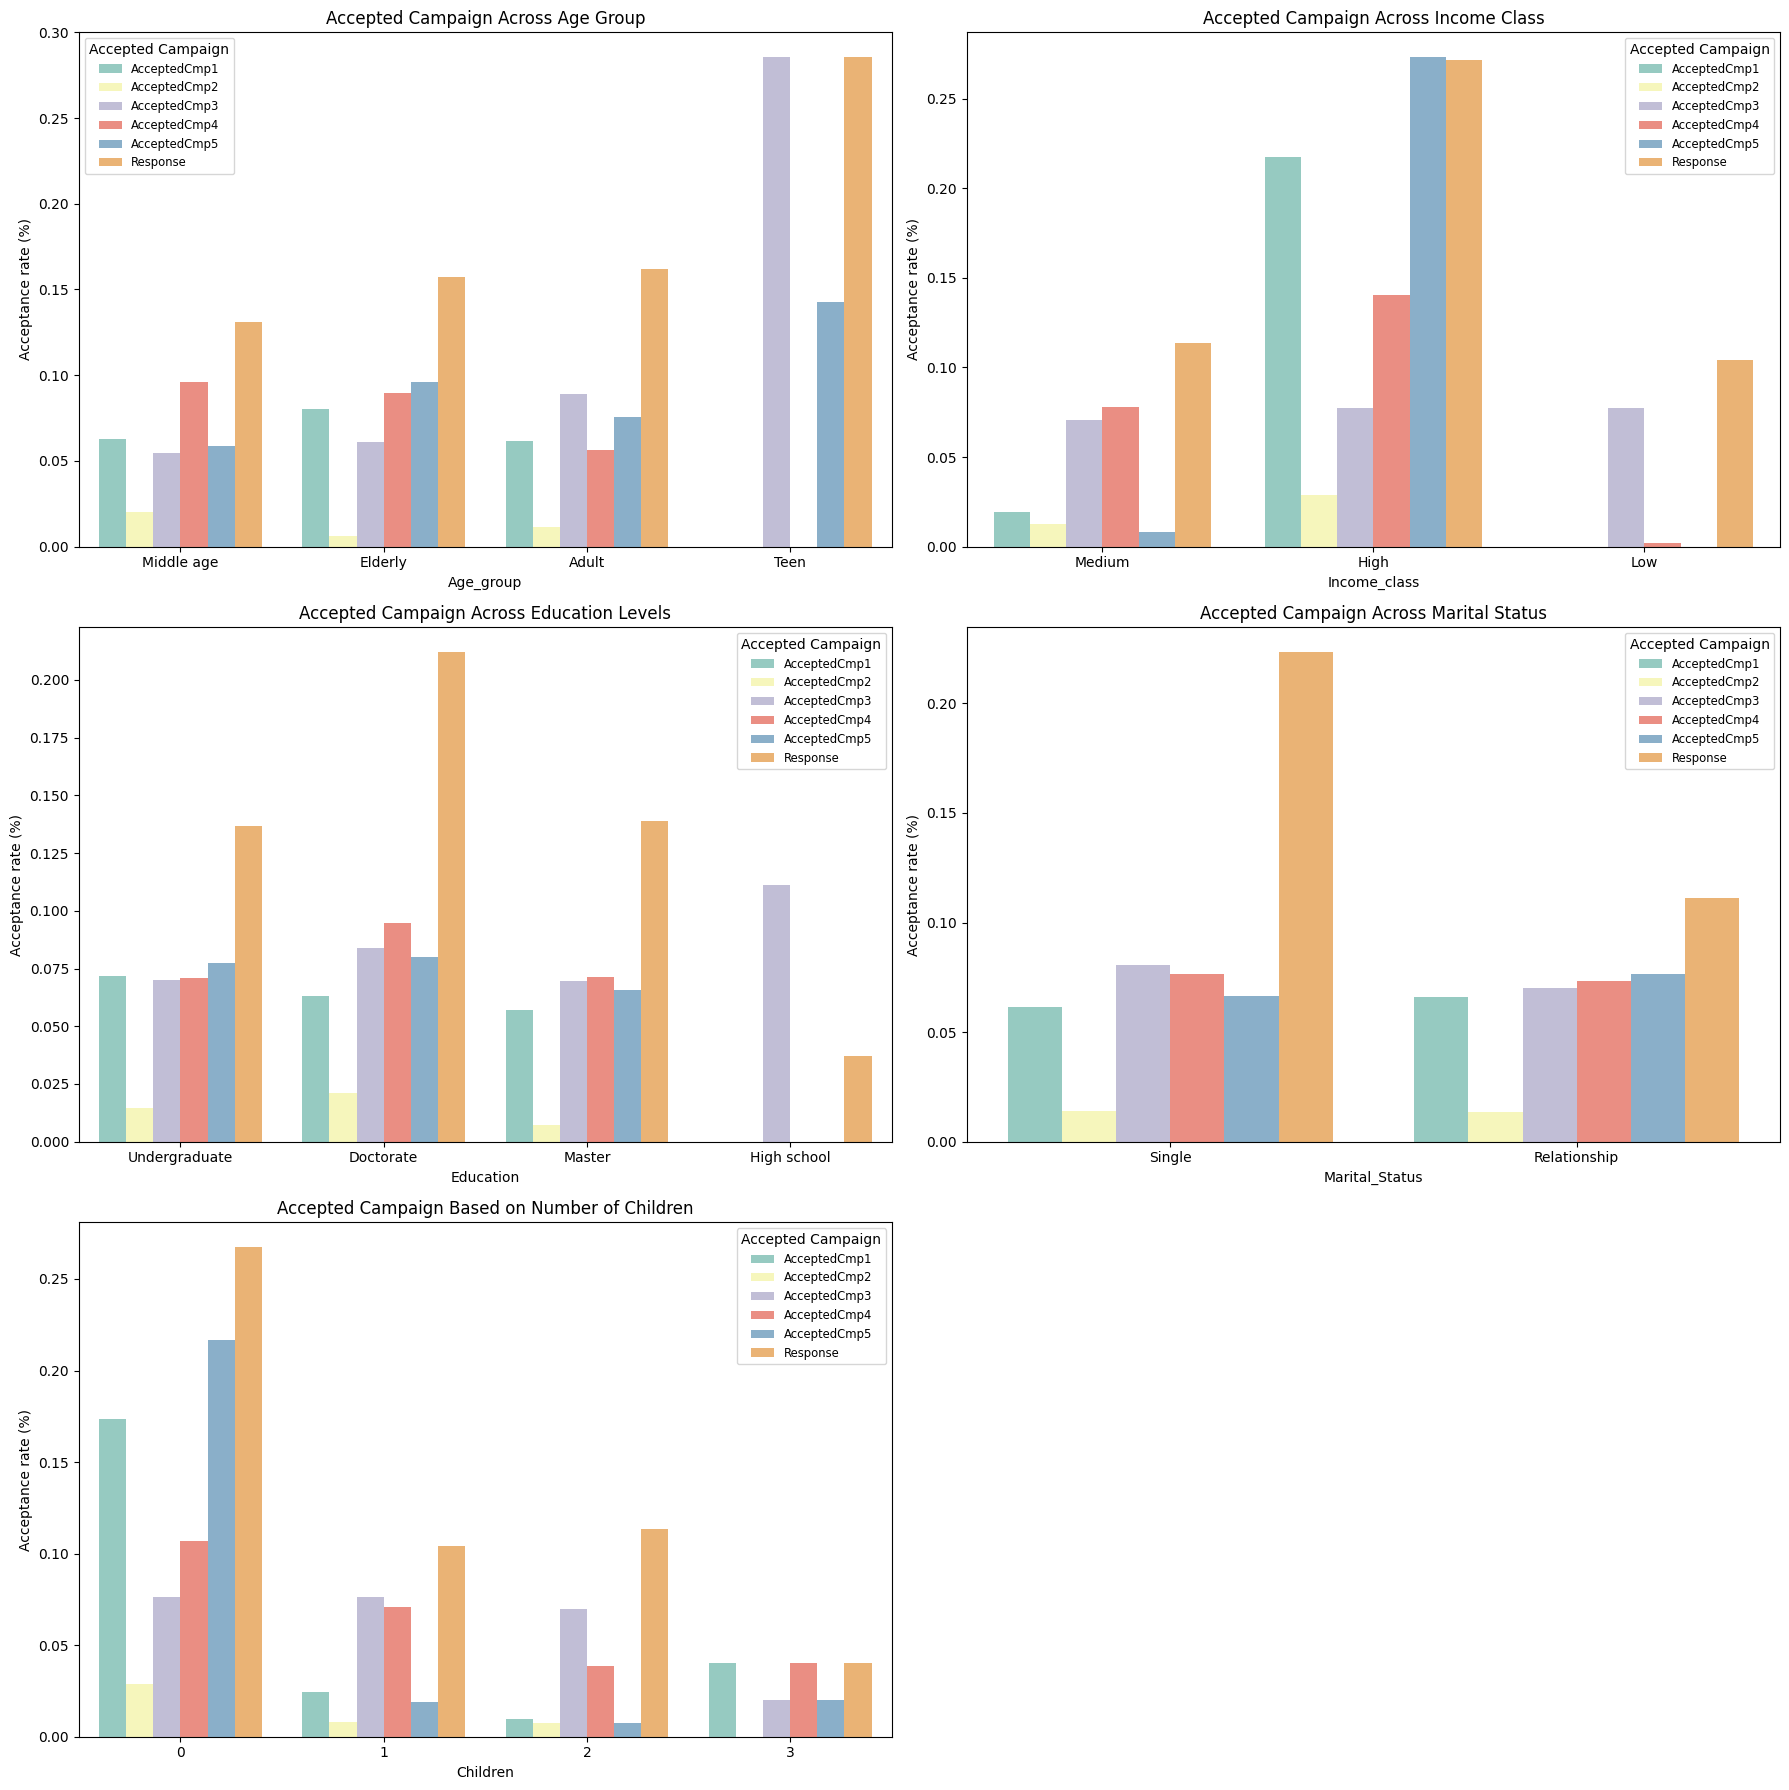

In [ ]:
# accpetance rate for each demographic variable
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()


plot_info = [
    ('Age_group', 'Accepted Campaign Across Age Group'),
    ('Income_class', 'Accepted Campaign Across Income Class'),
    ('Education', 'Accepted Campaign Across Education Levels'),
    ('Marital_Status', 'Accepted Campaign Across Marital Status'),
    ('Children', 'Accepted Campaign Based on Number of Children')
]

for i, (col, title) in enumerate(plot_info):
    df_melted = df.melt(
        id_vars=col,
        value_vars=campaign_cols,
        var_name='Accepted Campaign',
        value_name='Acceptance rate (%)'
    )

    sns.barplot(
        data=df_melted,
        x=col, y='Acceptance rate (%)',
        hue='Accepted Campaign',
        palette='Set3',
        ci=None,
        ax=axes[i]
    )
    axes[i].set_title(title)
    axes[i].legend(title='Accepted Campaign', fontsize='small')


fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

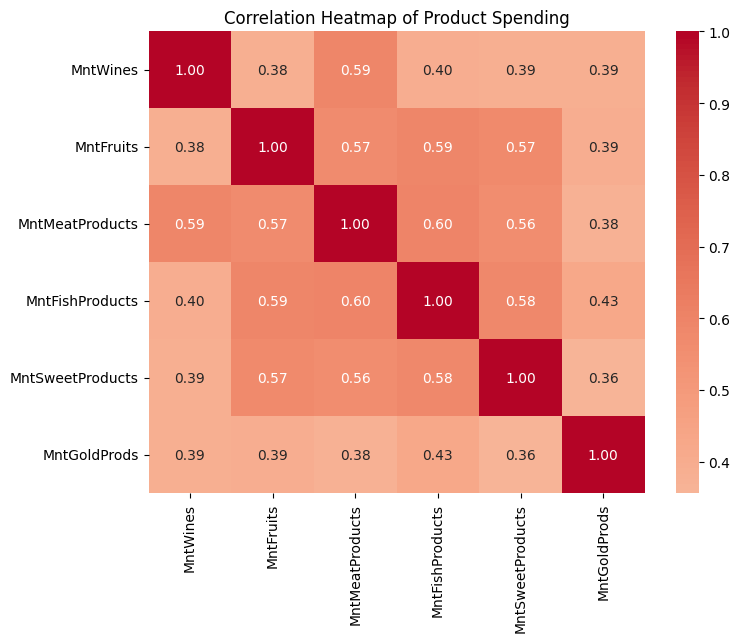

In [ ]:
corr_matrix = df[product_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Product Spending")
plt.show()

In [ ]:
corr_matrix

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.384947,0.593119,0.395967,0.388613,0.390194
MntFruits,0.384947,1.000000,0.568100,0.592556,0.570986,0.392596
MntMeatProducts,0.593119,0.568100,1.000000,0.595673,0.556511,0.375581
MntFishProducts,0.395967,0.592556,0.595673,1.000000,0.582974,0.425420
MntSweetProducts,0.388613,0.570986,0.556511,0.582974,1.000000,0.355747
MntGoldProds,0.390194,0.392596,0.375581,0.425420,0.355747,1.000000


> **Insight:**

Customer Overview

- Largest composition by age: Adult > Middle age > Elderly > Teen.  
- Income class: dominated by Medium, followed by High ≈ Low.  
- Education: majority are Undergraduate, followed by Master, Doctorate, and lastly High School.  
- Marital status: majority are in a Relationship compared to Single.  

Shopping Behavior

- Higher income correlates with higher spending across all product categories.  
- Products with the highest spending across all demographics: Wine and Meat.  
- No trend that older age = higher spending — younger customers can also spend as much as older customers.  
- Most preferred shopping channel: Store (offline) → followed by Website → lastly Catalog.  

Response to Campaigns

- Campaign 5 was the most successful across almost all demographic categories.  
- Campaign 2 had the worst performance.  
- Most responsive demographics:  
  1. Teen  
  2. High income  
  3. Doctorate/Master education  
  4. Single  
  5. 0 children  

- Less responsive demographics:  
  1. Elderly  
  2. Low income  
  3. High school education  
  4. Customers with ≥ 2 children  



## **5. Customer Segmentation Analysis**
### **5.1 Calculate LFRM Metrics per Customer**

**load the post-cleaning data**

In [ ]:
df = pd.read_csv(r'D:\Documents\0. JCDS\Module 2 - Data Analys\Capstone Project Module 2\supermarket_cleaned.csv', parse_dates=['Dt_Customer'], index_col=0).reset_index(drop=True)
df

,ID,Age,Age_group,Education,Marital_Status,Income,Income_class,Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Expenses,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,57,Middle age,Undergraduate,Single,58138.0,Medium,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Elderly,Undergraduate,Single,46344.0,Medium,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Middle age,Undergraduate,Relationship,71613.0,High,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Adult,Undergraduate,Relationship,26646.0,Low,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Adult,Doctorate,Relationship,58293.0,Medium,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,10870,47,Middle age,Undergraduate,Relationship,61223.0,Medium,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,0,0,0,0,0,0,0
2225,4001,68,Elderly,Doctorate,Relationship,64014.0,Medium,3,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,7,1,0,0,0,0,0,0
2226,7270,33,Adult,Undergraduate,Single,56981.0,Medium,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,0,0,0,1,0,0,0
2227,8235,58,Middle age,Master,Relationship,69245.0,High,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,0,0,0,0,0,0,0


**A. Length**
`L (Length)`: Measures the duration or length of the relationship between a customer and the company, usually calculated as the difference between the first and last purchase dates. This indicator reflects the customer’s long-term loyalty or commitment to the brand or product.

In [ ]:
# reference date
analysis_date = df['Dt_Customer'].max() + pd.Timedelta(days=0)

# function to receive the length of each customer
def get_customer_length(customer_date):
    day_diff = (analysis_date - customer_date.min()).days
    return day_diff

df_customer = df.groupby('ID').agg(
    length = ('Dt_Customer', get_customer_length)
).reset_index()

df_customer

,ID,length
0,0,421
1,1,14
2,9,680
3,13,342
4,17,296
...,...,...
2224,11176,48
2225,11178,98
2226,11187,405
2227,11188,124


**B. Recency**

`R (Recency)`: Measures how recent or up-to-date a customer’s last transaction is. The smaller the value, the more recent the transaction, indicating that the customer is still active.

In [ ]:
df_recency = df[['ID', 'Recency']]
df_recency.rename(columns={'Recency' : 'recency'}, inplace=True)
df_customer = df_customer.merge(df_recency, on='ID', how='left')

df_customer

,ID,length,recency
0,0,421,66
1,1,14,0
2,9,680,86
3,13,342,57
4,17,296,81
...,...,...,...
2224,11176,48,12
2225,11178,98,69
2226,11187,405,23
2227,11188,124,84


**C. Frequency**

`F (Frequency)`: Measures how often a customer makes transactions within a given period. Customers who purchase more frequently tend to be more loyal.

In [ ]:
df_customer['frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df_customer

,ID,length,recency,frequency
0,0,421,66,22
1,1,14,0,4
2,9,680,86,20
3,13,342,57,6
4,17,296,81,14
...,...,...,...,...
2224,11176,48,12,16
2225,11178,98,69,15
2226,11187,405,23,18
2227,11188,124,84,21


**D. Monetary**

`M (Monetary)`: Measures the total value or amount of money spent by a customer over a given period. The higher the value, the more valuable the customer is to the company.

In [ ]:
df_customer['monetary'] = df['Expenses']
df_customer

,ID,length,recency,frequency,monetary
0,0,421,66,22,1617
1,1,14,0,4,27
2,9,680,86,20,776
3,13,342,57,6,53
4,17,296,81,14,422
...,...,...,...,...,...
2224,11176,48,12,16,1341
2225,11178,98,69,15,444
2226,11187,405,23,18,1241
2227,11188,124,84,21,843


### **5.2 Score Assignment**

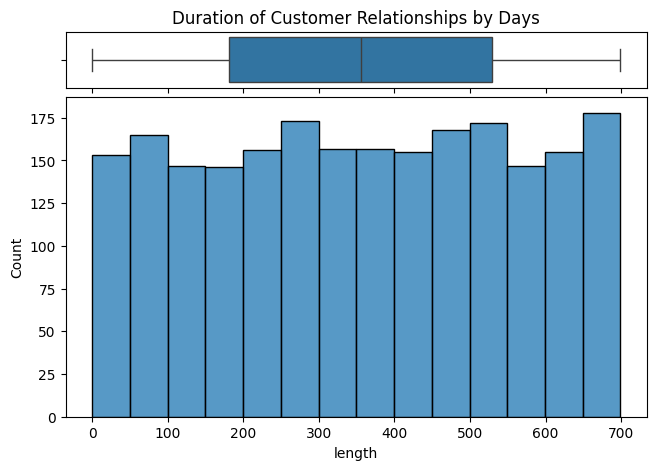

In [ ]:
# length
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='length', ax=ax_top)
sns.histplot(data=df_customer, x='length', ax=ax_bot)

ax_top.set(
    title='Duration of Customer Relationships by Days'
)

plt.show()

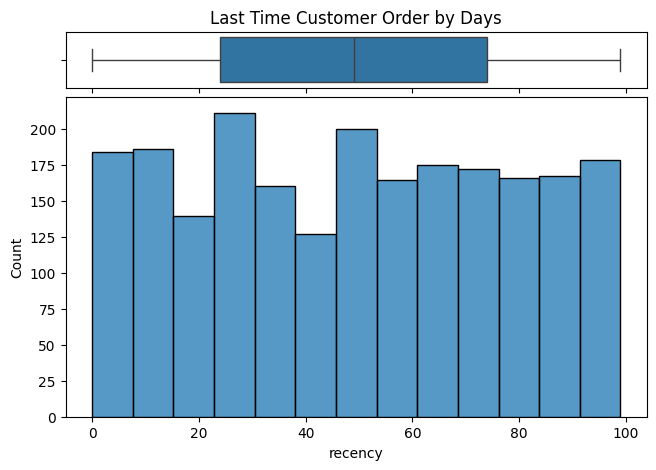

In [ ]:
# recency
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='recency', ax=ax_top)
sns.histplot(data=df_customer, x='recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()

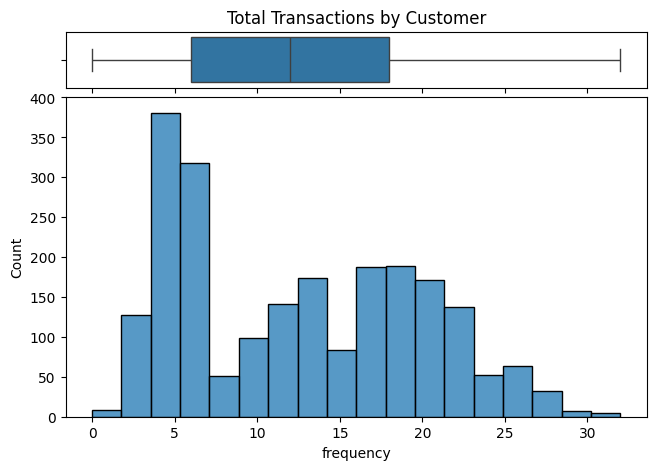

In [ ]:
# frequency
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='frequency', ax=ax_top)
sns.histplot(data=df_customer, x='frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()

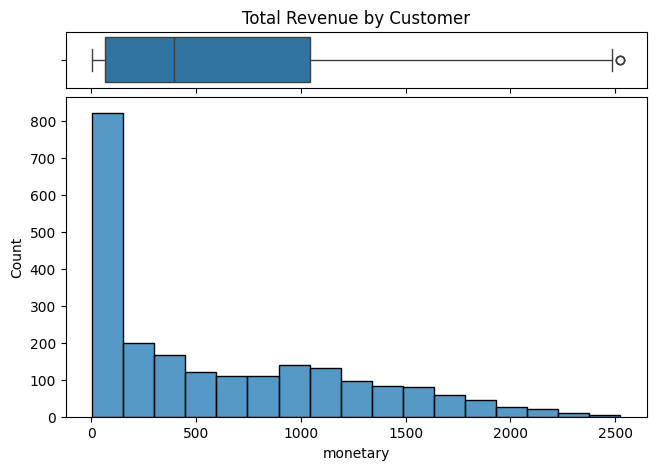

In [ ]:
# monetary
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='monetary', ax=ax_top)
sns.histplot(data=df_customer, x='monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()

In [ ]:
# scorring
df_customer['l_score'] = pd.qcut(df_customer['length'], 4, ['1','2','3','4'])
df_customer['r_score'] = pd.qcut(df_customer['recency'], 4, ['4','3','2','1'])
df_customer['f_score'] = pd.qcut(df_customer['frequency'], 4, ['1','2','3','4'])
df_customer['m_score'] = pd.qcut(df_customer['monetary'], 4, ['1','2','3','4'])
df_customer

,ID,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
0,0,421,66,22,1617,3,2,4,4
1,1,14,0,4,27,1,4,1,1
2,9,680,86,20,776,4,1,4,3
3,13,342,57,6,53,2,2,1,1
4,17,296,81,14,422,2,1,3,3
...,...,...,...,...,...,...,...,...,...
2224,11176,48,12,16,1341,1,4,3,4
2225,11178,98,69,15,444,1,2,3,3
2226,11187,405,23,18,1241,3,4,3,4
2227,11188,124,84,21,843,1,1,4,3


In [ ]:
# shows hte min and max value each parameter
display(
df_customer.groupby('l_score')['length'].agg(['min', 'max']).sort_index(ascending=False),
df_customer.groupby('r_score')['recency'].agg(['min', 'max']).sort_index(ascending=True),
df_customer.groupby('f_score')['frequency'].agg(['min', 'max']).sort_index(ascending=False),
df_customer.groupby('m_score')['monetary'].agg(['min', 'max']).sort_index(ascending=False)
)

,min,max
l_score,,
4,530,699
3,357,529
2,182,356
1,0,181


,min,max
r_score,,
4,0,24
3,25,49
2,50,74
1,75,99


,min,max
f_score,,
4,19,32
3,13,18
2,7,12
1,0,6


,min,max
m_score,,
4,1045,2525
3,398,1044
2,70,397
1,5,69


### **5.3 Segment Labelling - Individual Score Approacht**

The outcome score will then be used as a key factor to classify customer segmentation, enabling more targeted marketing strategies and personalized customer engagement.

This is based on the order in the code, so if multiple conditions are true, the first matching one will apply.

| No. | Segment Name           | L (Length)          | R (Recency)         | F (Frequency)       | M (Monetary)        | Meaning                                                                        |
| --- | ---------------------- | ------------------- | ------------------- | ------------------- | ------------------- | ------------------------------------------------------------------------------ |
| 1   | **Champion**           |   4                 |   4                 |   4                 |   4                 | Top customers with maximum scores in all parameters                            |
| 2   | **Loyal Customer**     |   4                 | *any*               |   4                 |   4                 | Long relationship, high frequency and high spending, even if recency isn’t top |
| 3   | **Big Spender**        | *any*               | *any*               | *any*               |   4                 | High spenders regardless of other factors                                      |
| 4   | **Potential Loyalist** | *any*               | *any*               |  3-4                |   3-4               | Potentially loyal due to decent frequency and spending                         |
| 5   | **New Customer**       | ≤ 2                 |  3-4                | ≤ 2                 | *any*               | Recently joined, active recently but with low purchase frequency               |
| 6   | **At Risk**            | ≥ 3                 | ≤ 2                 | ≥ 3                 | *any*               | Previously active, now less recent activity                                    |
| 7   | **Loyal Lost**         | ≥ 3                 | *any*               | ≥ 3                 | ≤ 2                 | Visits often but spends little                                                 |
| 8   | **Occasional Shopper** | *any*               | *any*               | = 2 or M = 2        | *depends*           | Shops occasionally, not consistent                                             |
| 9   | **Dormant / Lost**     | *not matched above* | *not matched above* | *not matched above* | *not matched above* | Inactive customers who don’t fit any other category                            |






In [ ]:
df_customer.isna().sum()

ID           0
length       0
recency      0
frequency    0
monetary     0
l_score      0
r_score      0
f_score      0
m_score      0
dtype: int64

In [ ]:
# Function for segmentation
def classify_customer(length, recency, frequency, monetary):
    if length >= 4 and recency >= 4 and frequency >= 4 and monetary >= 4:
        return "Champion"
    elif length >= 4 and frequency >= 4 and monetary >= 4:
        return "Loyal Customer"
    elif monetary >= 4:
        return "Big Spender"
    elif frequency >= 3 and monetary >= 3:
        return "Potential Loyalist"
    elif length <= 2 and recency >= 3 and frequency <= 2:
        return "New Customer"
    elif length >= 3 and recency <= 2 and frequency >= 3:
        return "At Risk"
    elif length >= 3 and frequency >= 3 and monetary <= 2:
        return "Loyal Lost"
    elif frequency == 2 or monetary == 2:
        return "Occasional Shopper"
    else:
        return "Dormant / Lost"

In [ ]:
# apply the function
df_customer['cust_segment_class'] = df_customer.apply(
    lambda x: classify_customer(
        int(x['l_score']),
        int(x['r_score']),
        int(x['f_score']),
        int(x['m_score'])
    ),
    axis=1
)

In [ ]:
# segmentation classes sum
df_customer['cust_segment_class'].value_counts()

cust_segment_class
Potential Loyalist    529
Big Spender           477
Occasional Shopper    438
Dormant / Lost        393
New Customer          298
Loyal Customer         64
Champion               16
At Risk                 9
Loyal Lost              5
Name: count, dtype: int64

In [ ]:
df_customer.query('cust_segment_class =="Dormant / Lost"').head(10)
# this query as basis for Dormant/ Lost segmentation

,ID,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,cust_segment_class
3,13,342,57,6,53,2,2,1,1,Dormant / Lost
8,25,590,9,5,46,4,4,1,1,Dormant / Lost
9,35,659,35,1,49,4,3,1,1,Dormant / Lost
10,48,66,97,3,19,1,1,1,1,Dormant / Lost
14,73,399,81,4,46,3,1,1,1,Dormant / Lost
30,176,178,73,6,30,1,2,1,1,Dormant / Lost
35,195,672,21,5,65,4,4,1,1,Dormant / Lost
38,203,441,47,5,67,3,3,1,1,Dormant / Lost
41,221,428,90,5,53,3,1,1,1,Dormant / Lost
42,231,110,86,3,22,1,1,1,1,Dormant / Lost


In [ ]:
df = df.merge(
    df_customer[['ID', 'cust_segment_class']],
    on='ID',
    how='left',
)
df

,ID,Age,Age_group,Education,Marital_Status,Income,Income_class,Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Expenses,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,cust_segment_class
0,5524,57,Middle age,Undergraduate,Single,58138.0,Medium,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1,Dormant / Lost
1,2174,60,Elderly,Undergraduate,Single,46344.0,Medium,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,New Customer
2,4141,49,Middle age,Undergraduate,Relationship,71613.0,High,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,New Customer
3,6182,30,Adult,Undergraduate,Relationship,26646.0,Low,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,Potential Loyalist
4,5324,33,Adult,Doctorate,Relationship,58293.0,Medium,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,Potential Loyalist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,10870,47,Middle age,Undergraduate,Relationship,61223.0,Medium,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,0,0,0,0,0,0,0,Occasional Shopper
2225,4001,68,Elderly,Doctorate,Relationship,64014.0,Medium,3,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,7,1,0,0,0,0,0,0,Occasional Shopper
2226,7270,33,Adult,Undergraduate,Single,56981.0,Medium,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,0,0,0,1,0,0,0,Occasional Shopper
2227,8235,58,Middle age,Master,Relationship,69245.0,High,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,0,0,0,0,0,0,0,New Customer


<Axes: xlabel='count', ylabel='cust_segment_class'>

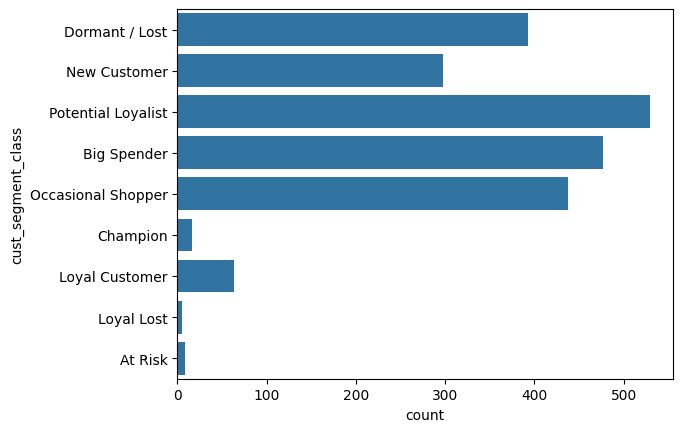

In [ ]:
sns.countplot(data=df, y='cust_segment_class')

**Inisght:**
- high value customer based on LFRM analysis: champion and loyal customer
- growth potential high value customer: potential loyalist and big spender
- number of growth potential hvc outnumbered the high value customer itself

## **5. Demographic Analysis by Customer Segmentation**

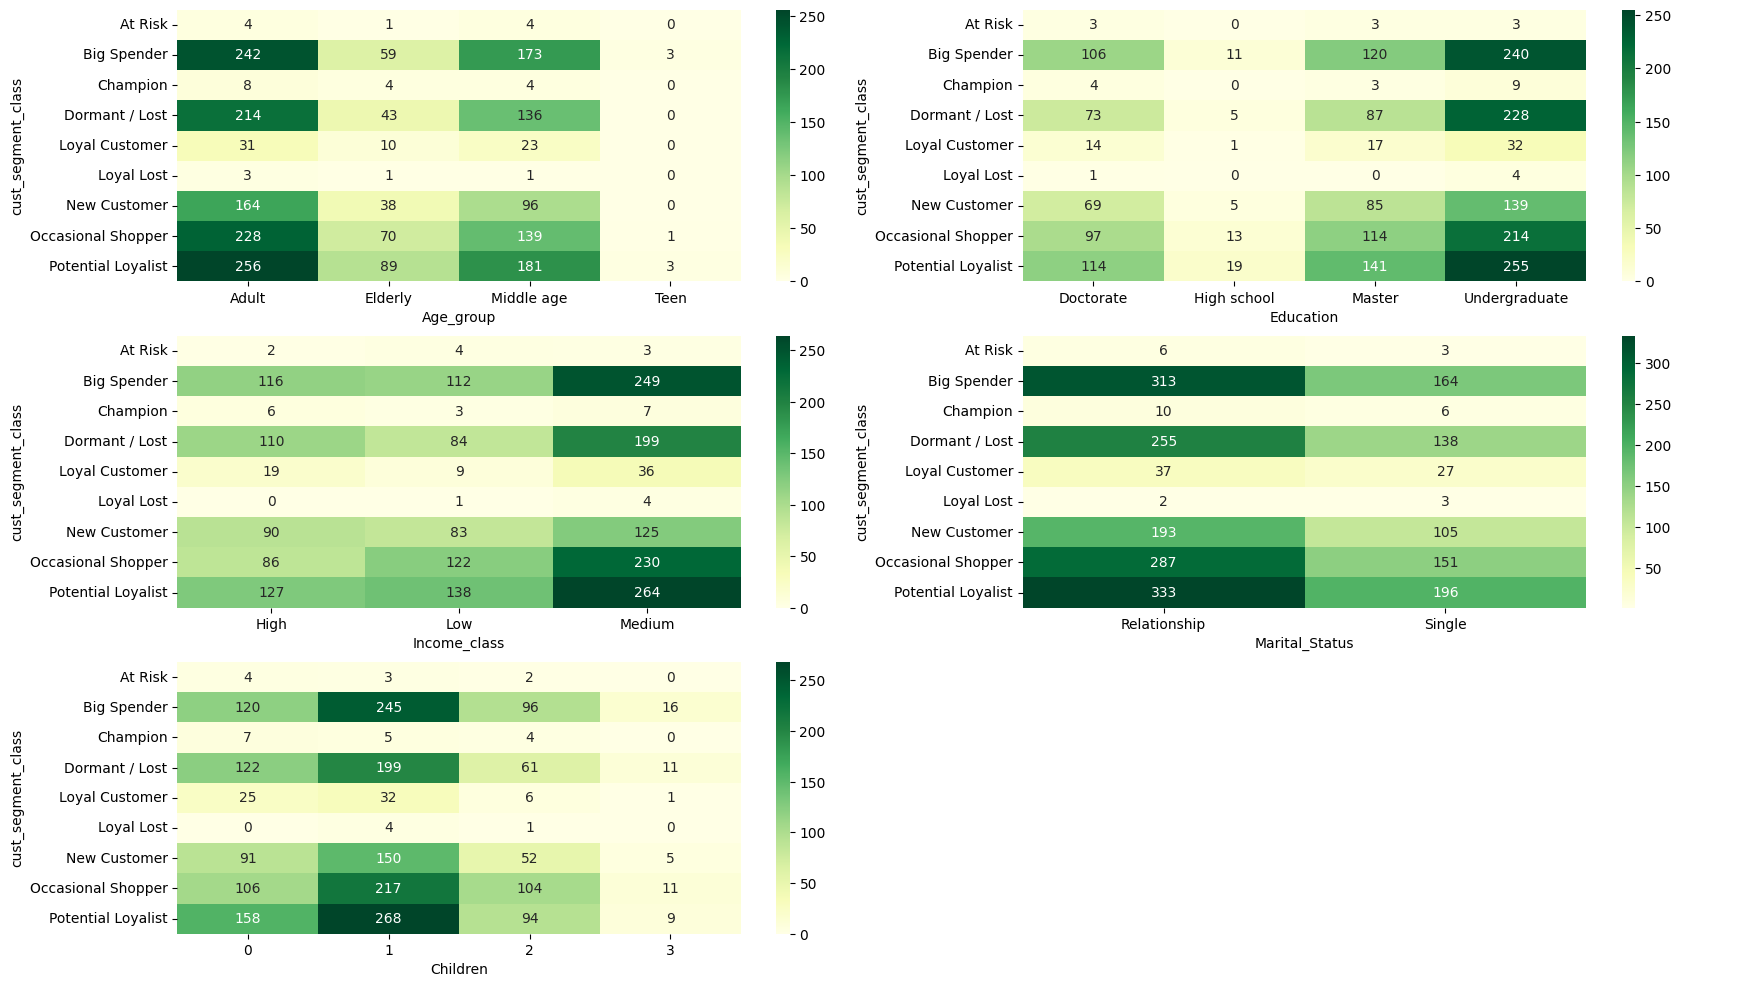

In [ ]:
# Number of customers in each customer segment class across different demographic variables
seg_age_ct = pd.crosstab(index=df['cust_segment_class'], columns=df['Age_group'])
seg_edu_ct = pd.crosstab(index=df['cust_segment_class'], columns=df['Education'])
seg_inc_ct = pd.crosstab(index=df['cust_segment_class'], columns=df['Income_class'])
seg_mar_ct = pd.crosstab(index=df['cust_segment_class'], columns=df['Marital_Status'])
seg_chi_ct = pd.crosstab(index=df['cust_segment_class'], columns=df['Children'])

fig, axes = plt.subplots(3, 2, figsize=(20, 12))
sns.heatmap(seg_age_ct, ax=axes[0,0], annot=True, fmt='d', cmap='YlGn')
sns.heatmap(seg_edu_ct, ax=axes[0,1], annot=True, fmt='d', cmap='YlGn')
sns.heatmap(seg_inc_ct, ax=axes[1,0], annot=True, fmt='d', cmap='YlGn')
sns.heatmap(seg_mar_ct, ax=axes[1,1], annot=True, fmt='d', cmap='YlGn')
sns.heatmap(seg_chi_ct, ax=axes[2,0], annot=True, fmt='d', cmap='YlGn')

axes[2,1].axis('off')

plt.show()

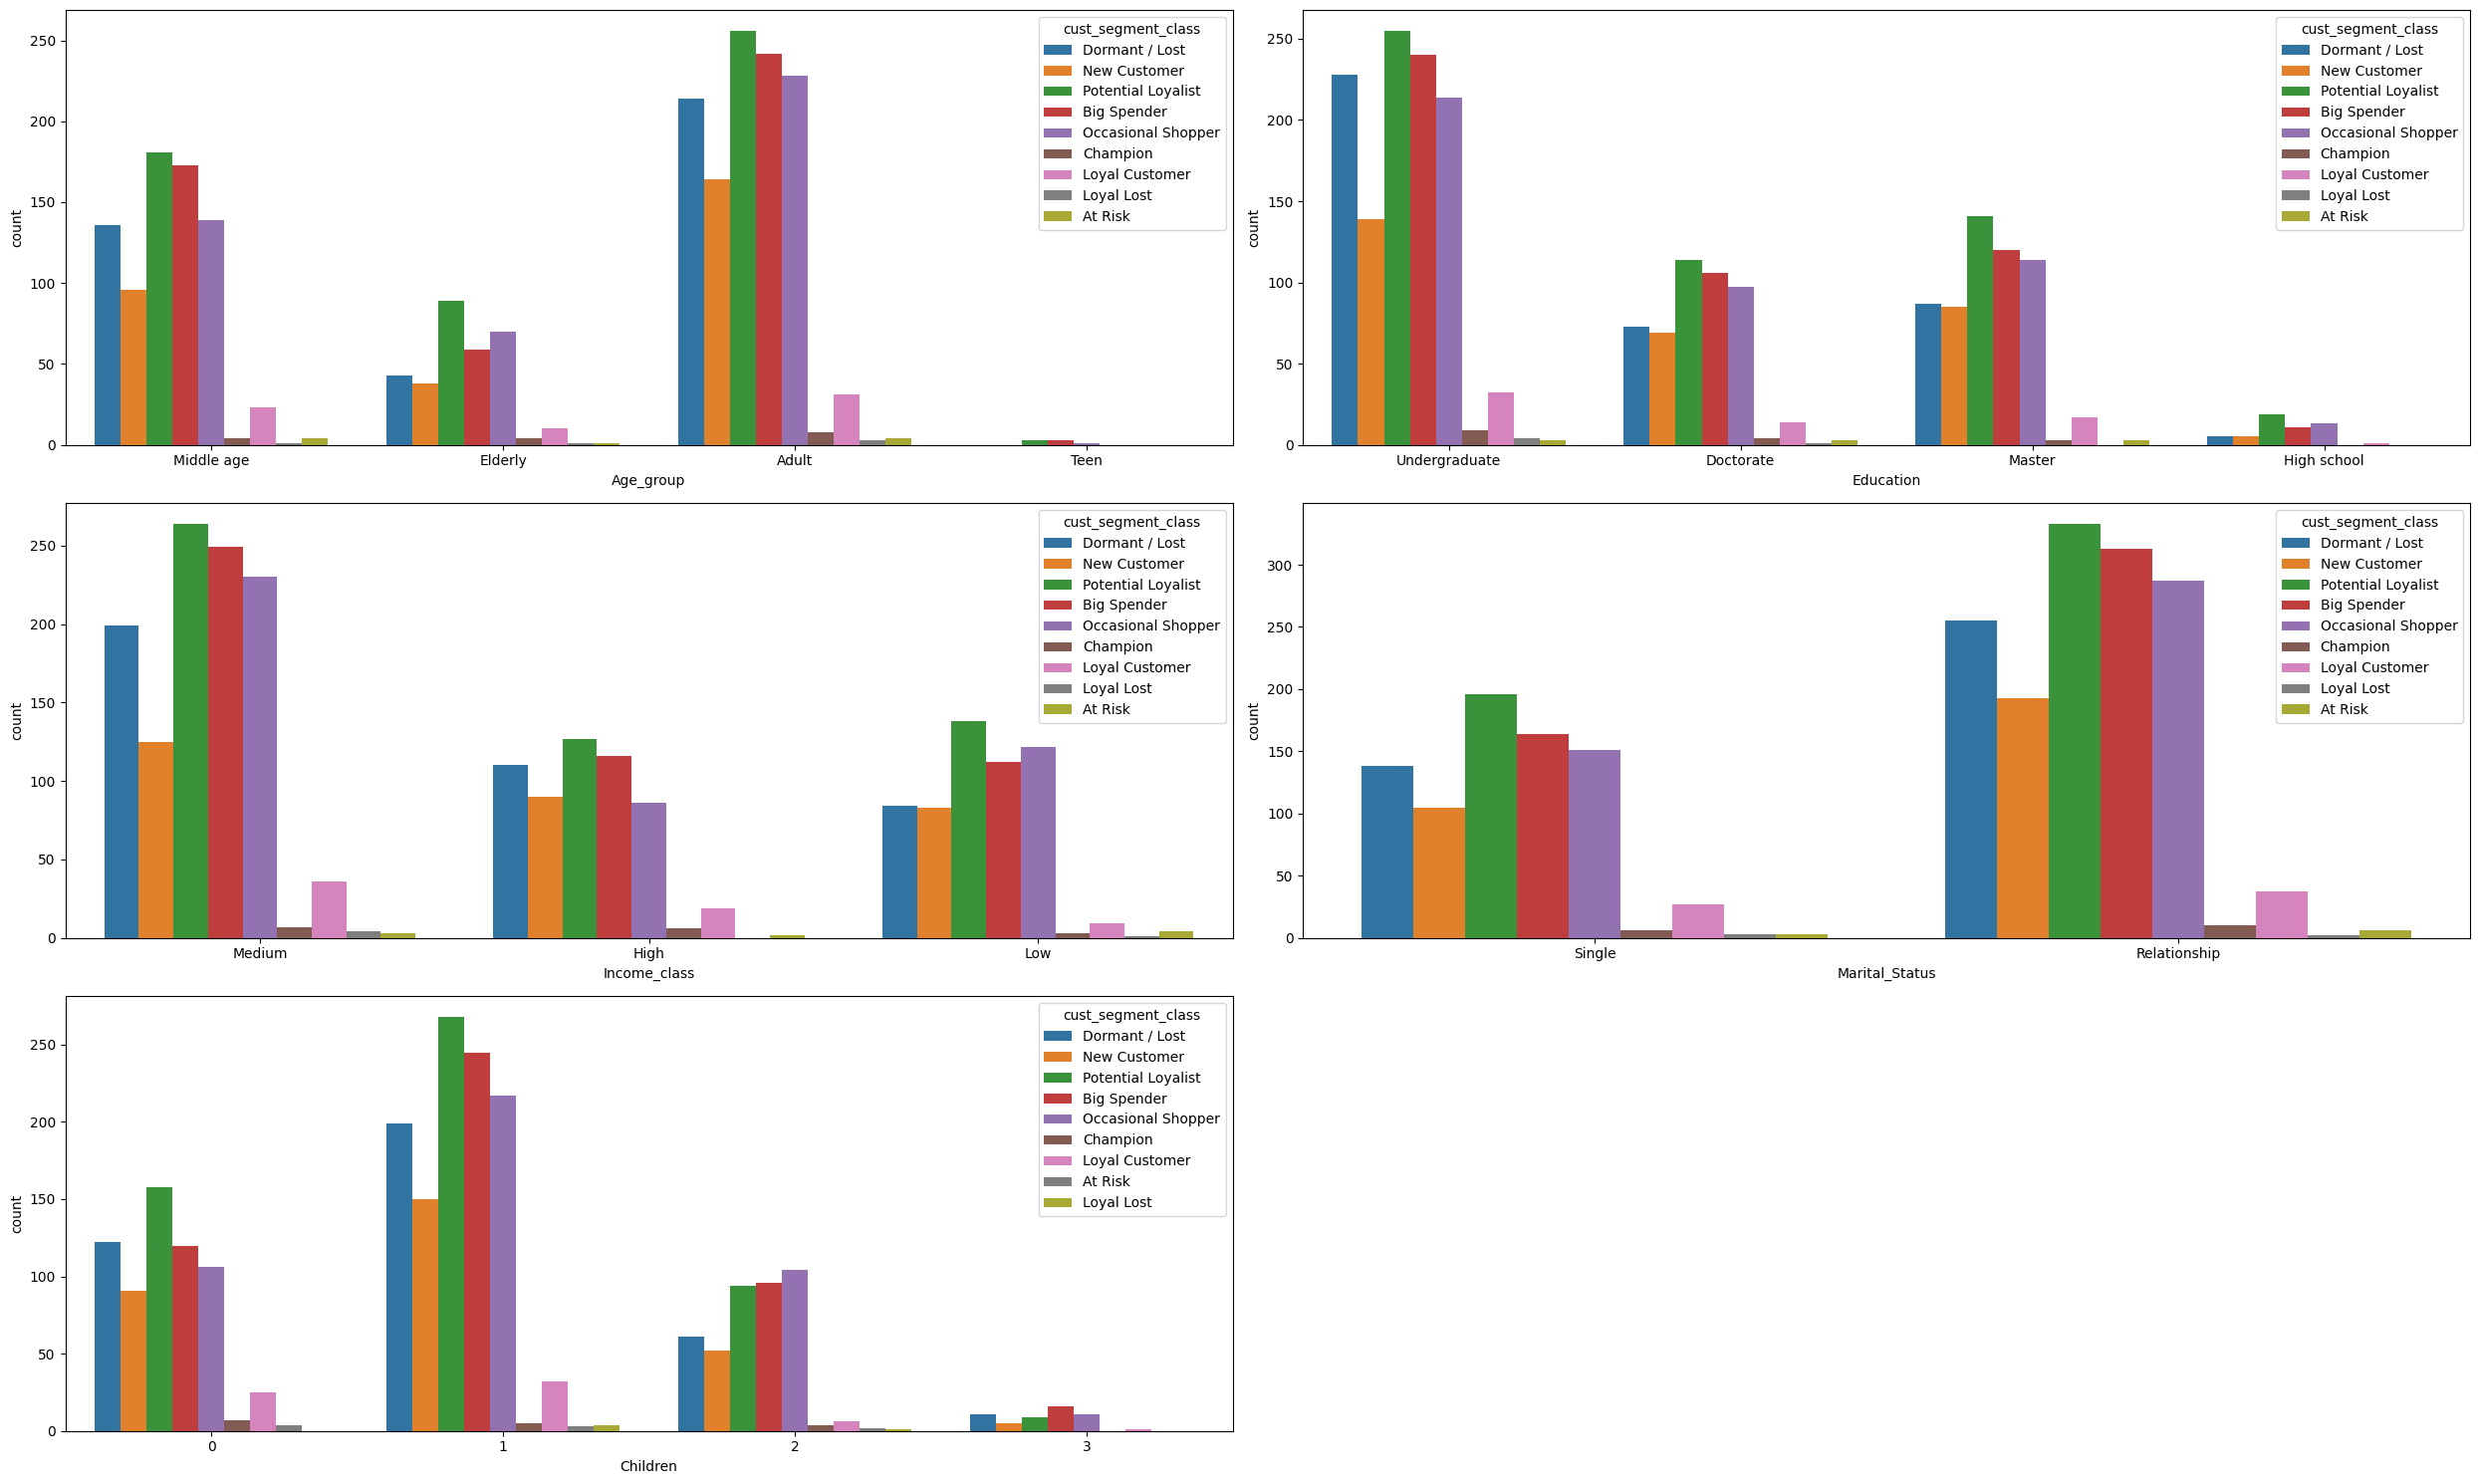

In [ ]:
# Number of customers in each customer segment class across different demographic variables in bar plot
fig, axes = plt.subplots(3, 2, figsize=(25, 15))

sns.countplot(data=df, x='Age_group', hue='cust_segment_class', ax=axes[0,0])
sns.countplot(data=df, x='Education', hue='cust_segment_class', ax=axes[0,1])
sns.countplot(data=df, x='Income_class', hue='cust_segment_class', ax=axes[1,0])
sns.countplot(data=df, x='Marital_Status', hue='cust_segment_class', ax=axes[1,1])
sns.countplot(data=df, x='Children', hue='cust_segment_class', ax=axes[2,0])

axes[2,1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Percentage of segmentation for each demographic variable
df_seg_age_percent = (pd.crosstab(df['cust_segment_class'], df['Age_group'], normalize='index') * 100).round(2)
df_seg_edu_percent = (pd.crosstab(df['cust_segment_class'], df['Education'], normalize='index') * 100).round(2)
df_seg_income_percent = (pd.crosstab(df['cust_segment_class'], df['Income_class'], normalize='index') * 100).round(2)
df_seg_children_percent = (pd.crosstab(df['cust_segment_class'], df['Children'], normalize='index') * 100).round(2)
df_seg_marrital_percent = (pd.crosstab(df['cust_segment_class'], df['Marital_Status'], normalize='index') * 100).round(2)

display(df_seg_age_percent, df_seg_edu_percent, df_seg_income_percent, df_seg_children_percent, df_seg_marrital_percent)

Age_group,Adult,Elderly,Middle age,Teen
cust_segment_class,,,,
At Risk,44.44,11.11,44.44,0.00
Big Spender,50.73,12.37,36.27,0.63
Champion,50.00,25.00,25.00,0.00
Dormant / Lost,54.45,10.94,34.61,0.00
Loyal Customer,48.44,15.62,35.94,0.00
Loyal Lost,60.00,20.00,20.00,0.00
New Customer,55.03,12.75,32.21,0.00
Occasional Shopper,52.05,15.98,31.74,0.23
Potential Loyalist,48.39,16.82,34.22,0.57


Education,Doctorate,High school,Master,Undergraduate
cust_segment_class,,,,
At Risk,33.33,0.00,33.33,33.33
Big Spender,22.22,2.31,25.16,50.31
Champion,25.00,0.00,18.75,56.25
Dormant / Lost,18.58,1.27,22.14,58.02
Loyal Customer,21.88,1.56,26.56,50.00
Loyal Lost,20.00,0.00,0.00,80.00
New Customer,23.15,1.68,28.52,46.64
Occasional Shopper,22.15,2.97,26.03,48.86
Potential Loyalist,21.55,3.59,26.65,48.20


Income_class,High,Low,Medium
cust_segment_class,,,
At Risk,22.22,44.44,33.33
Big Spender,24.32,23.48,52.20
Champion,37.50,18.75,43.75
Dormant / Lost,27.99,21.37,50.64
Loyal Customer,29.69,14.06,56.25
Loyal Lost,0.00,20.00,80.00
New Customer,30.20,27.85,41.95
Occasional Shopper,19.63,27.85,52.51
Potential Loyalist,24.01,26.09,49.91


Children,0,1,2,3
cust_segment_class,,,,
At Risk,44.44,33.33,22.22,0.00
Big Spender,25.16,51.36,20.13,3.35
Champion,43.75,31.25,25.00,0.00
Dormant / Lost,31.04,50.64,15.52,2.80
Loyal Customer,39.06,50.00,9.38,1.56
Loyal Lost,0.00,80.00,20.00,0.00
New Customer,30.54,50.34,17.45,1.68
Occasional Shopper,24.20,49.54,23.74,2.51
Potential Loyalist,29.87,50.66,17.77,1.70


Marital_Status,Relationship,Single
cust_segment_class,,
At Risk,66.67,33.33
Big Spender,65.62,34.38
Champion,62.50,37.50
Dormant / Lost,64.89,35.11
Loyal Customer,57.81,42.19
Loyal Lost,40.00,60.00
New Customer,64.77,35.23
Occasional Shopper,65.53,34.47
Potential Loyalist,62.95,37.05


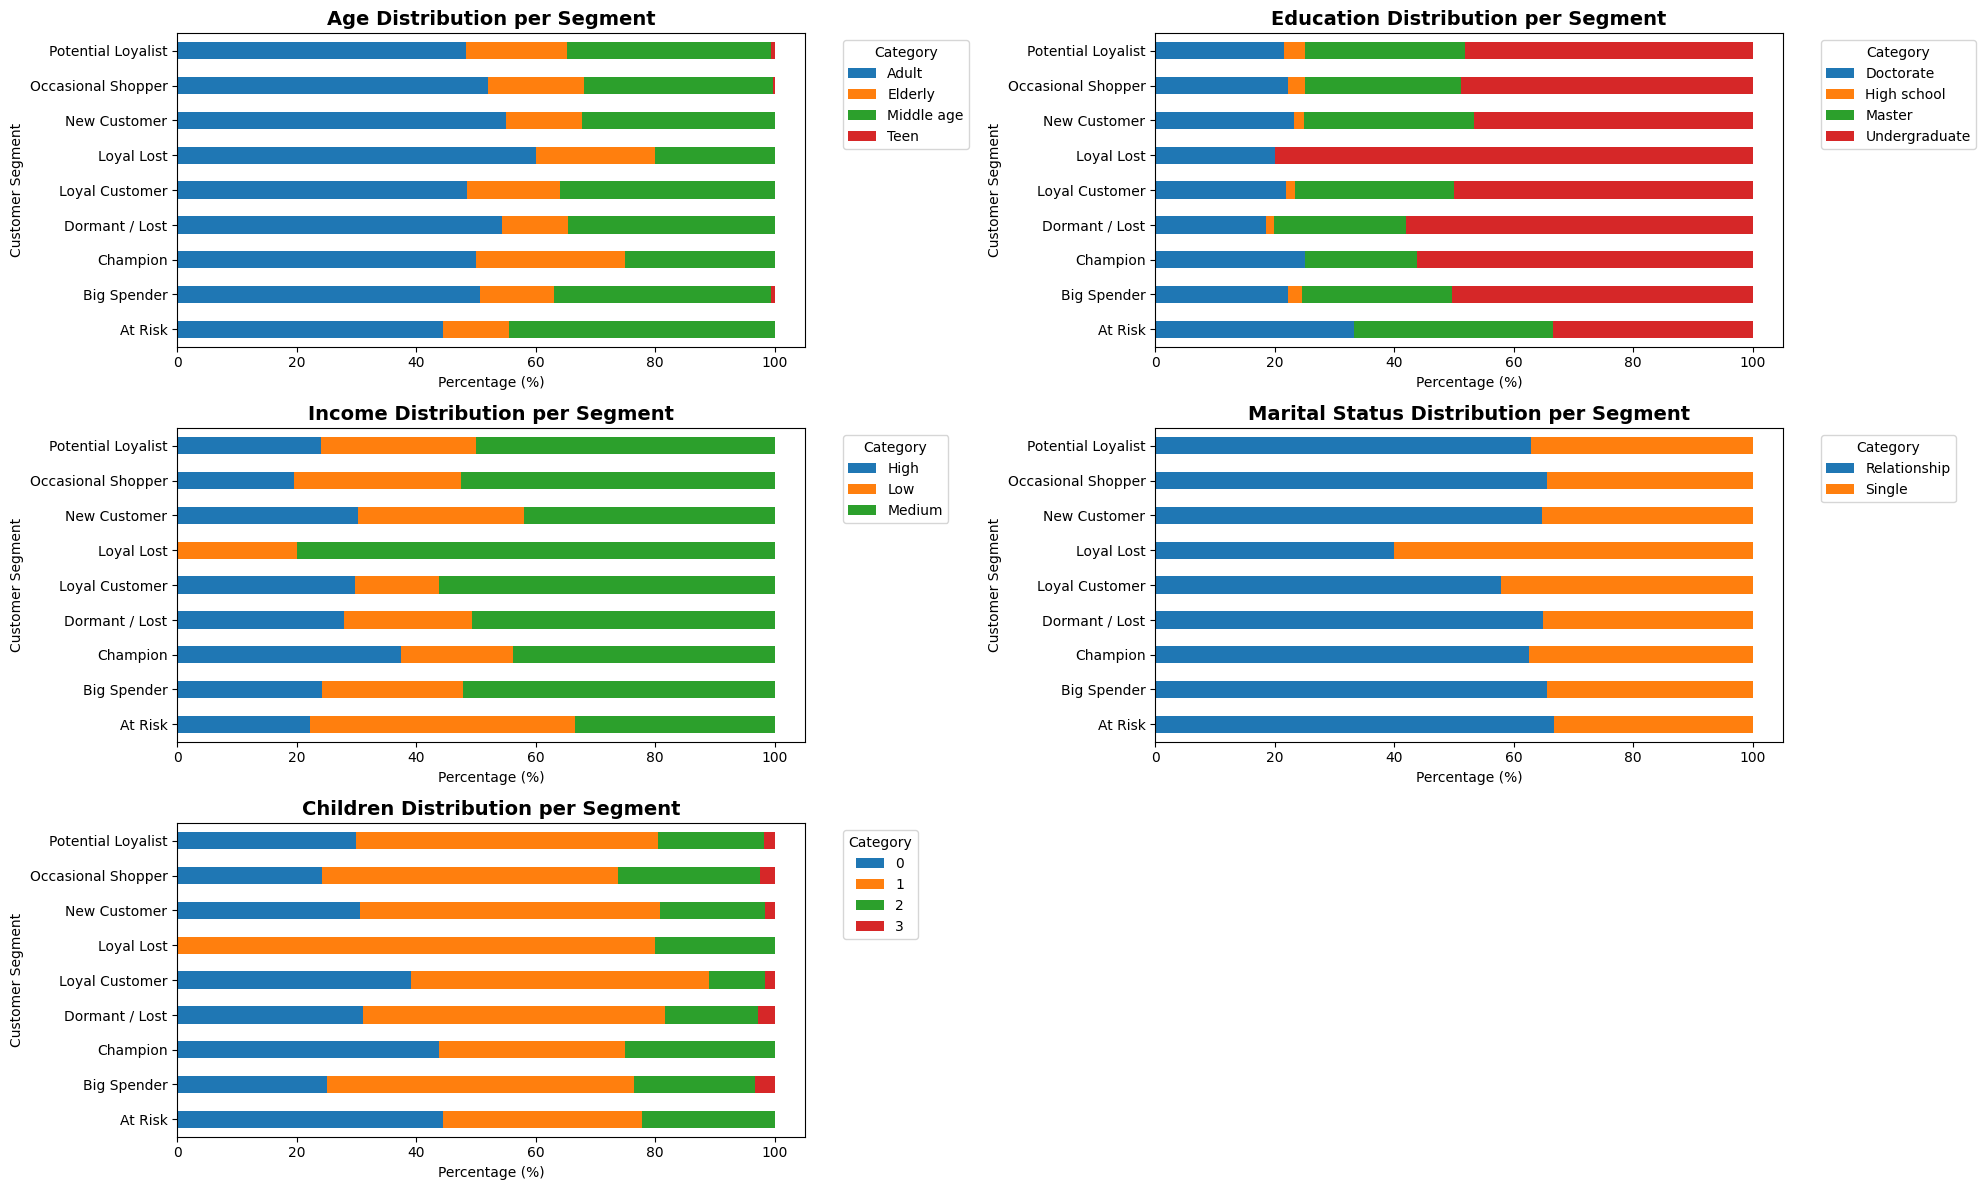

In [ ]:
# Proportion of segments across various demographic variables
fig, axes = plt.subplots(3, 2, figsize=(20, 12))
axes = axes.flatten()

dfs = [
    (df_seg_age_percent, 'Age Distribution per Segment'),
    (df_seg_edu_percent, 'Education Distribution per Segment'),
    (df_seg_income_percent, 'Income Distribution per Segment'),
    (df_seg_marrital_percent, 'Marital Status Distribution per Segment'),
    (df_seg_children_percent, 'Children Distribution per Segment'),
]

for i, (dfPlot, title) in enumerate(dfs):
    dfPlot.plot(kind='barh', stacked=True, ax=axes[i])
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Percentage (%)')
    axes[i].set_ylabel('Customer Segment')
    axes[i].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

**Insight:**  

**1. High-Value Customers (Champion & Loyal Customer)**  
- Champion  
  - The number is indeed small, but dominant in:  
    - Age: Adult  
    - Income: High income  
    - Education: Undergraduate and Master  
    - Marital Status: Relationship  
    - Children: 0 children  

- Loyal Customer  
  - Relatively small, but many in:  
    - Age: Adult  
    - Income: High income  
    - Education: Undergraduate  
    - Marital Status: Relationship  
    - Children: 0 children  

**2. Growth Potential HVC (Potential Loyalist & Big Spender)**  
- Potential Loyalist  
  - Large in number, peak in:  
    - Income: Medium income  
    - Age: Adult / Middle age  
    - Education: Undergraduate & Master  
    - Marital Status: Relationship  
    - Children: 1 child  

- Big Spender  
  - Also large in number, peak in:  
    - Income: High income  
    - Age: Adult  
    - Education: Undergraduate & Master  
    - Marital Status: Relationship  
    - Children: 0 children  


## **6. Product Purchase Analysis by Customer Segment**

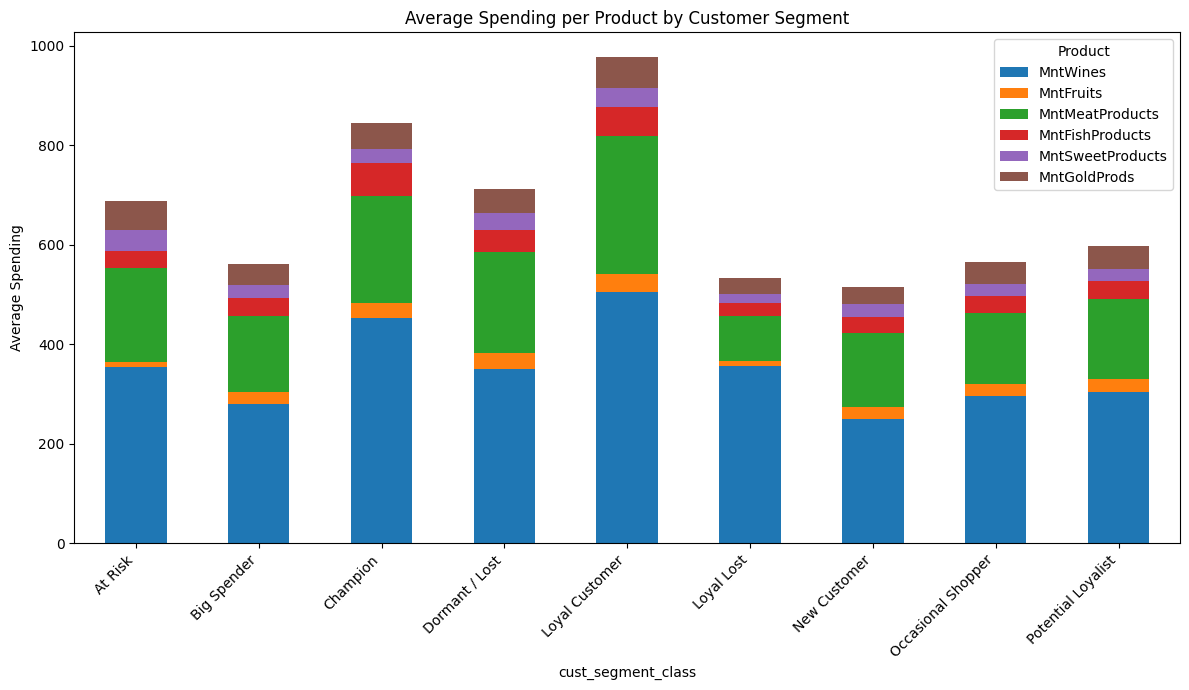

In [ ]:
# Average spending proportion on products per segment
seg_prdct_mean = df.groupby('cust_segment_class')[product_cols].mean()

seg_prdct_mean.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    title="Average Spending per Product by Customer Segment"
)
plt.ylabel("Average Spending")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Product")
plt.tight_layout()
plt.show()

In [ ]:
# Total spending per category per segment
product_sum_per_segment = df.groupby('cust_segment_class')[product_cols].sum()
product_sum_per_segment

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cust_segment_class,,,,,,
At Risk,3190,88,1705,301,387,513
Big Spender,133330,11281,73178,17075,12979,20242
Champion,7234,479,3469,1041,464,816
Dormant / Lost,137294,12699,79772,17580,13374,19159
Loyal Customer,32305,2337,17747,3686,2528,4000
Loyal Lost,1781,52,450,130,97,152
New Customer,74204,7585,44394,9514,7412,10115
Occasional Shopper,129757,10431,62493,15186,10602,19283
Potential Loyalist,160731,13779,85210,19392,12700,24048


In [ ]:
# Average spending per category per segment
product_mean_per_segment = df.groupby('cust_segment_class')[product_cols].mean().round(2)
product_mean_per_segment

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cust_segment_class,,,,,,
At Risk,354.44,9.78,189.44,33.44,43.00,57.00
Big Spender,279.52,23.65,153.41,35.80,27.21,42.44
Champion,452.12,29.94,216.81,65.06,29.00,51.00
Dormant / Lost,349.35,32.31,202.98,44.73,34.03,48.75
Loyal Customer,504.77,36.52,277.30,57.59,39.50,62.50
Loyal Lost,356.20,10.40,90.00,26.00,19.40,30.40
New Customer,249.01,25.45,148.97,31.93,24.87,33.94
Occasional Shopper,296.25,23.82,142.68,34.67,24.21,44.03
Potential Loyalist,303.84,26.05,161.08,36.66,24.01,45.46


In [ ]:
# Percentage spending per category per segment
seg_prdct_percent = seg_prdct_mean.apply(lambda row: (row / row.sum()) * 100, axis=1)
seg_prdct_percent

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cust_segment_class,,,,,,
At Risk,51.584735,1.423027,27.571151,4.867400,6.258085,8.295602
Big Spender,49.734226,4.207994,27.296566,6.369249,4.841375,7.550590
Champion,53.573280,3.547360,25.690587,7.709398,3.436273,6.043102
Dormant / Lost,49.054945,4.537334,28.502419,6.281308,4.778511,6.845483
Loyal Customer,51.602958,3.733048,28.348482,5.887897,4.038145,6.389470
Loyal Lost,66.904583,1.953418,16.904583,4.883546,3.643877,5.709992
New Customer,48.428445,4.950269,28.973268,6.209210,4.837362,6.601446
Occasional Shopper,52.373745,4.210259,25.224014,6.129517,4.279279,7.783186
Potential Loyalist,50.886785,4.362376,26.977142,6.139429,4.020769,7.613500


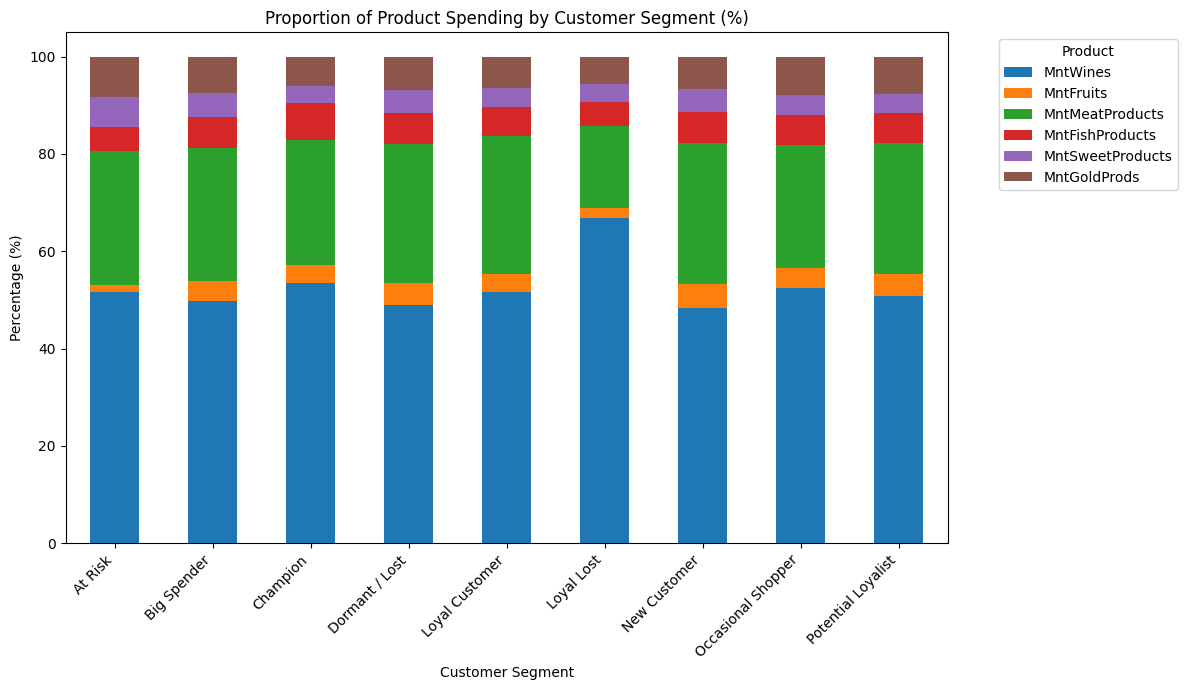

In [ ]:
# proportion in percentage
seg_prdct_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
)

plt.title("Proportion of Product Spending by Customer Segment (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Customer Segment")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

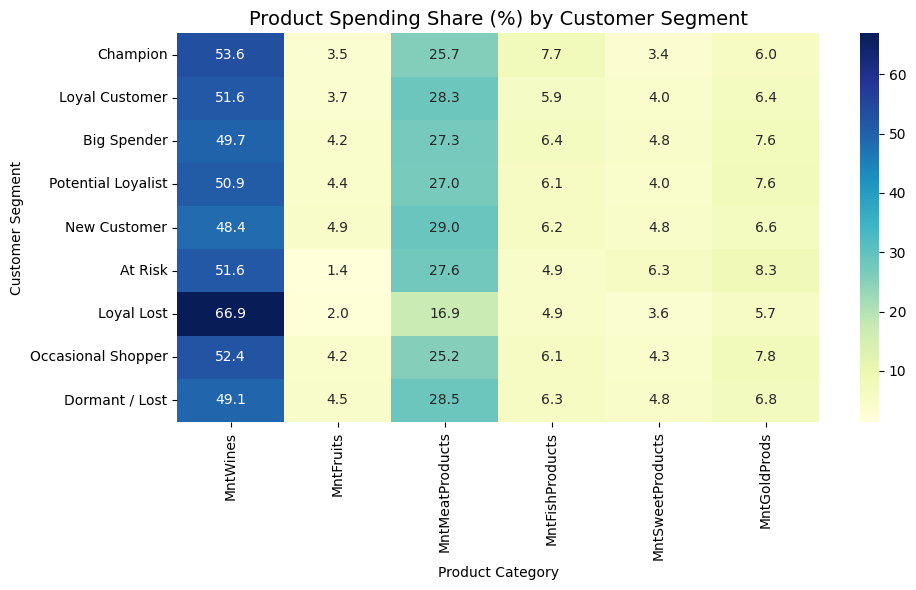

In [ ]:
# percentage proportion in heatmap
segment_order = [
    'Champion',
    'Loyal Customer',
    'Big Spender',
    'Potential Loyalist',
    'New Customer',
    'At Risk',
    'Loyal Lost',
    'Occasional Shopper',
    'Dormant / Lost'
]
product_mean_per_segment = product_mean_per_segment.loc[segment_order]

product_percent_per_segment = product_mean_per_segment.div(
    product_mean_per_segment.sum(axis=1), axis=0
) * 100


plt.figure(figsize=(10, 6))
sns.heatmap(product_percent_per_segment, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Product Spending Share (%) by Customer Segment", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Customer Segment")
plt.tight_layout()
plt.show()


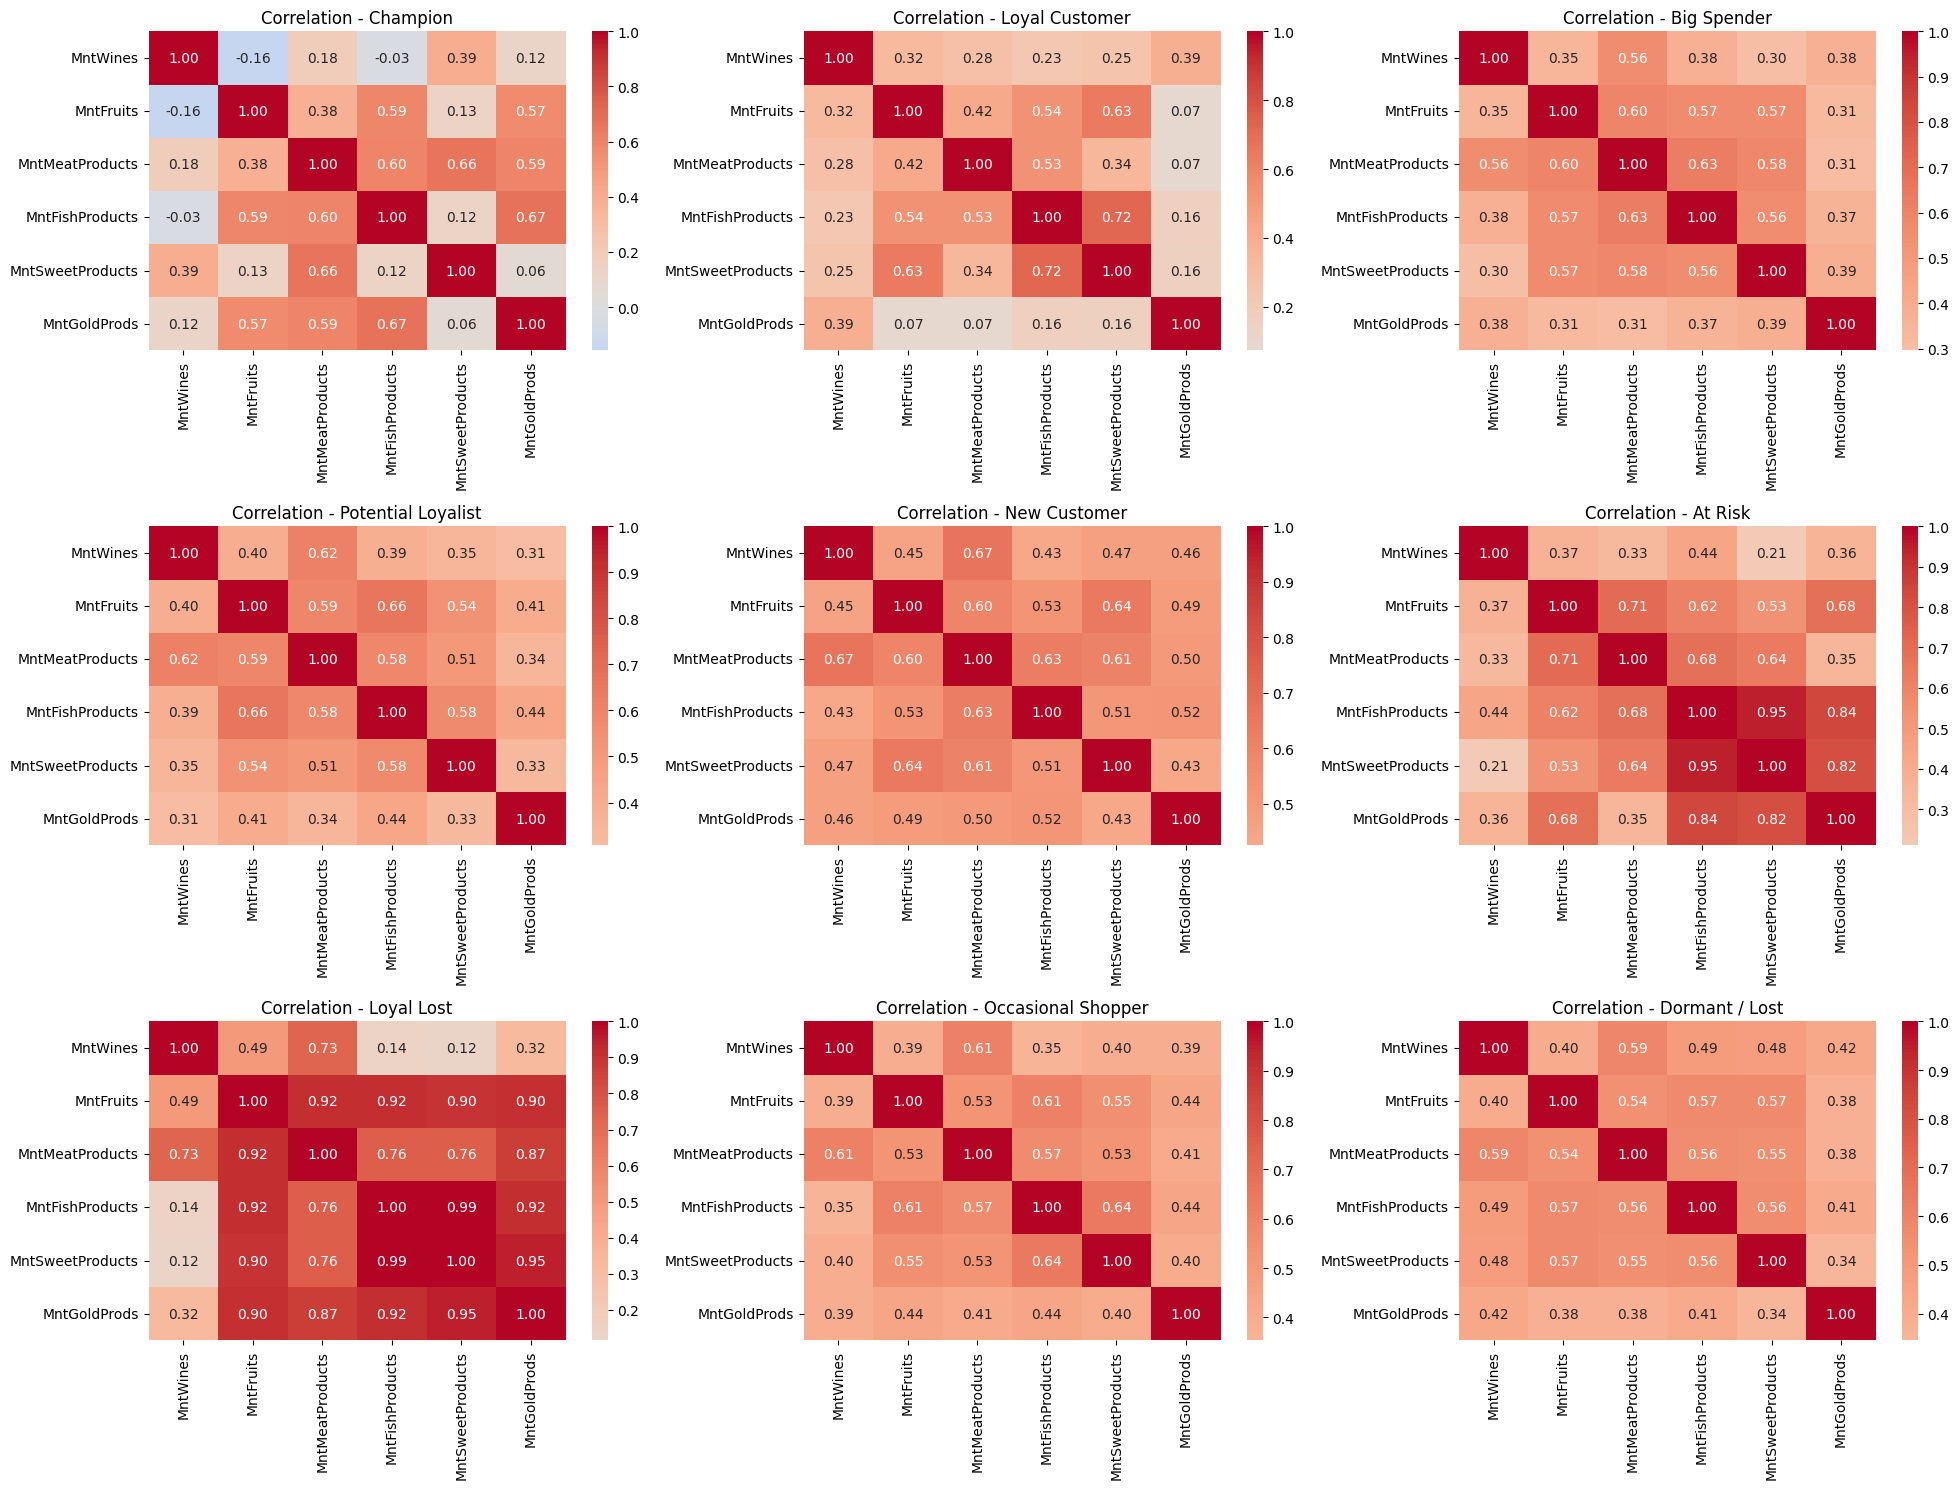

In [ ]:
# correlation between products
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

axes = axes.flatten()

for i, segment in enumerate(segment_order):
    seg_data = df[df['cust_segment_class'] == segment][product_cols]
    corr = seg_data.corr()

    sns.heatmap(
        corr, annot=True, cmap='coolwarm', center=0, fmt=".2f",
        ax=axes[i]
    )
    axes[i].set_title(f"Correlation - {segment}", fontsize=12)

plt.tight_layout()
plt.show()

# **Insights**

Overall
- Wine and meat are the categories with the highest spending from consumers.  
- Across almost all segments, fish and fruit products show a strong correlation.  


**1. High-Value Customers (Champion & Loyal Customers)**

Champion

- **Wine vs. Meat (0.64):** Customers who spend more on wine also tend to spend more on meat.  
- **Wine vs. Gold (-0.56):** High wine spending correlates with low gold spending. These should not be combined in the same campaign!  
- **Meat vs. Fish (0.35):** Moderate correlation.  

Loyal Customers

- Correlations across products are relatively weak → spending is more varied, not dependent on a single category.  
- Sweets have a small positive correlation with all categories → potential as an add-on item.  
- Multi-product bundles could work well.  



**2. Growth Potential HVC (Potential Loyalists & Big Spenders)**

Potential Loyalists

- Strong positive correlations among Meat–Fish–Sweets (0.4–0.5).  
- Wine shows negative correlations with all categories → avoid mixing them. Consider two separate campaigns: one for wine, another for food.  

Big Spenders

- Moderate correlations among Meat–Fish–Sweets (~0.3–0.4).  
- Wine follows a similar pattern to Potential Loyalists (negative correlations across all).  


## **7. Promotion Analysis by Customer Segment**

In [ ]:
# calculate acceptance rate
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
acceptance_rate = df[campaign_cols].mean().sort_values(ascending=False) * 100
acceptance_rate

Response        14.984298
AcceptedCmp4     7.492149
AcceptedCmp3     7.312696
AcceptedCmp5     7.267833
AcceptedCmp1     6.460296
AcceptedCmp2     1.345895
dtype: float64

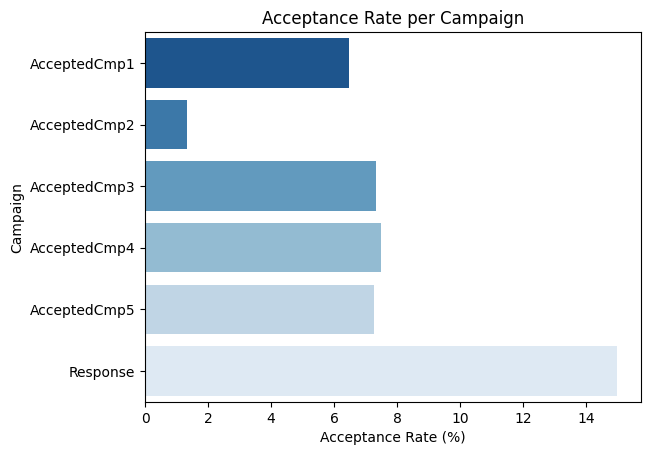

In [ ]:
sns.barplot(
    x=acceptance_rate.values,
    y=acceptance_rate.index,
    palette='Blues_r', order=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
)
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Campaign')
plt.title('Acceptance Rate per Campaign')
plt.show()

In [ ]:
# accpetance rate per segmentation
acceptance_by_segment = (df.groupby('cust_segment_class')[campaign_cols].mean() * 100).reset_index()
acceptance_by_segment

,cust_segment_class,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,At Risk,0.000000,0.000000,0.000000,11.111111,11.111111,11.111111
1,Big Spender,5.031447,1.048218,8.385744,5.241090,5.031447,11.949686
2,Champion,18.750000,0.000000,0.000000,12.500000,18.750000,62.500000
3,Dormant / Lost,7.633588,1.781170,5.343511,7.633588,8.396947,16.030534
4,Loyal Customer,6.250000,3.125000,15.625000,15.625000,10.937500,26.562500
5,Loyal Lost,20.000000,20.000000,0.000000,20.000000,0.000000,20.000000
6,New Customer,8.389262,2.013423,10.067114,5.704698,7.718121,15.436242
7,Occasional Shopper,5.479452,1.141553,6.392694,7.305936,6.621005,13.470320
8,Potential Loyalist,6.238185,0.756144,6.427221,9.262760,7.939509,15.122873


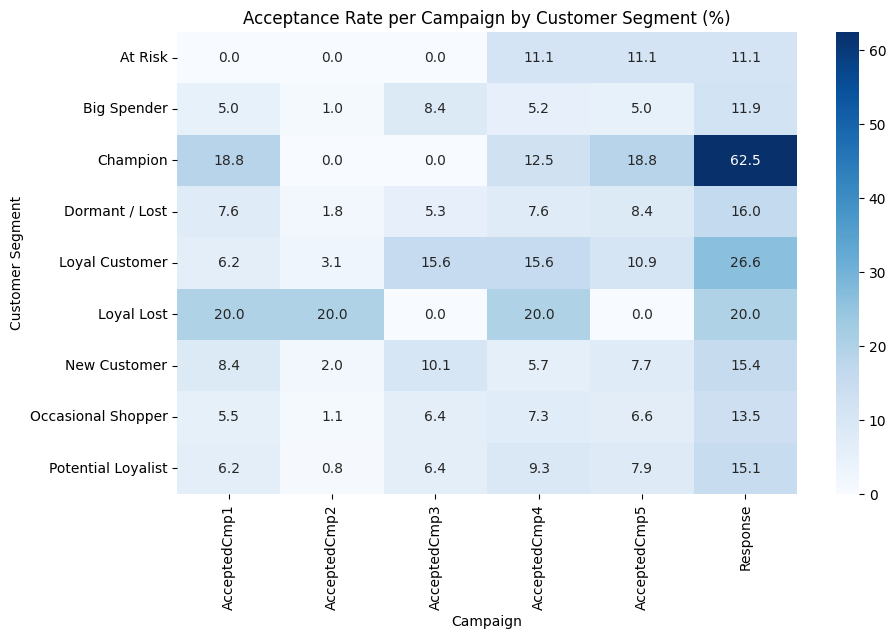

In [ ]:
# Comparison of segmentation figures
plt.figure(figsize=(10,6))
sns.heatmap(
    acceptance_by_segment.set_index('cust_segment_class'),
    annot=True,
    fmt='.1f',
    cmap='Blues'
)
plt.title('Acceptance Rate per Campaign by Customer Segment (%)')
plt.ylabel('Customer Segment')
plt.xlabel('Campaign')
plt.show()

In [ ]:
df['TotalAccepted'] = df[campaign_cols].sum(axis=1)
df['TotalAccepted'].value_counts()

TotalAccepted
0    1621
1     369
2     142
3      51
4      36
5      10
Name: count, dtype: int64

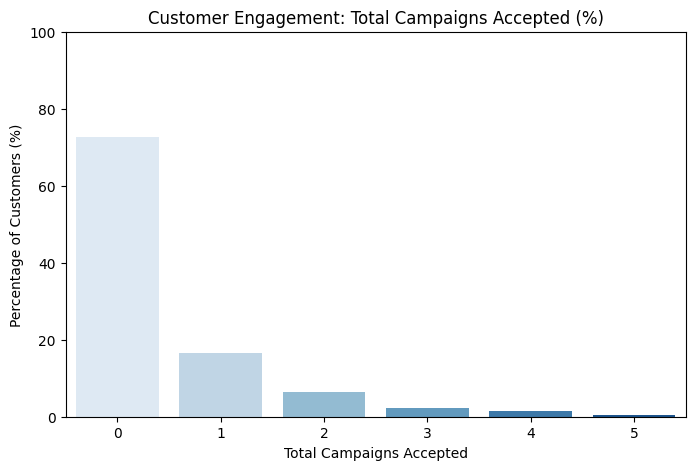

In [ ]:
total_counts = df['TotalAccepted'].value_counts().sort_index()

total_proporsi = (total_counts / total_counts.sum()) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=total_proporsi.index, y=total_proporsi.values, palette='Blues')
plt.xlabel('Total Campaigns Accepted')
plt.ylabel('Percentage of Customers (%)')
plt.title('Customer Engagement: Total Campaigns Accepted (%)')
plt.ylim(0, 100)
plt.show()

In [ ]:
engagement_by_segment = (
    df.groupby('cust_segment_class')['TotalAccepted']
    .value_counts(normalize=True)
    .reset_index()
)
engagement_by_segment['count'] = df.groupby('cust_segment_class')['TotalAccepted'].value_counts().reset_index()['count']
engagement_by_segment = engagement_by_segment[['cust_segment_class', 'TotalAccepted', 'count']]
engagement_by_segment

,cust_segment_class,TotalAccepted,count
0,At Risk,0,8
1,At Risk,3,1
2,Big Spender,0,359
3,Big Spender,1,84
4,Big Spender,2,21
5,Big Spender,3,6
6,Big Spender,4,4
7,Big Spender,5,3
8,Champion,1,6
9,Champion,0,5


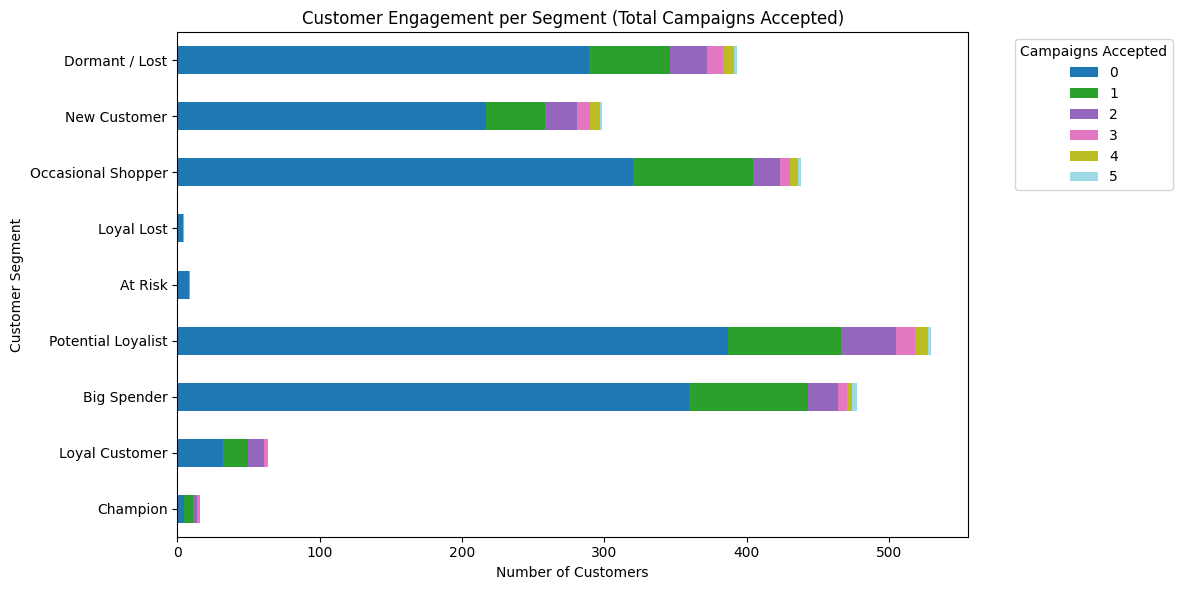

In [ ]:
pivot_df = engagement_by_segment.pivot(
    index='cust_segment_class',
    columns='TotalAccepted',
    values='count'
).fillna(0)

pivot_df = pivot_df.loc[
    ["Champion", "Loyal Customer", "Big Spender", "Potential Loyalist",
     "At Risk", "Loyal Lost", "Occasional Shopper", "New Customer", "Dormant / Lost"]
]


ax = pivot_df.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 6),
    cmap='tab20'
)

plt.title("Customer Engagement per Segment (Total Campaigns Accepted)")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Segment")
plt.legend(
    title="Campaigns Accepted",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()


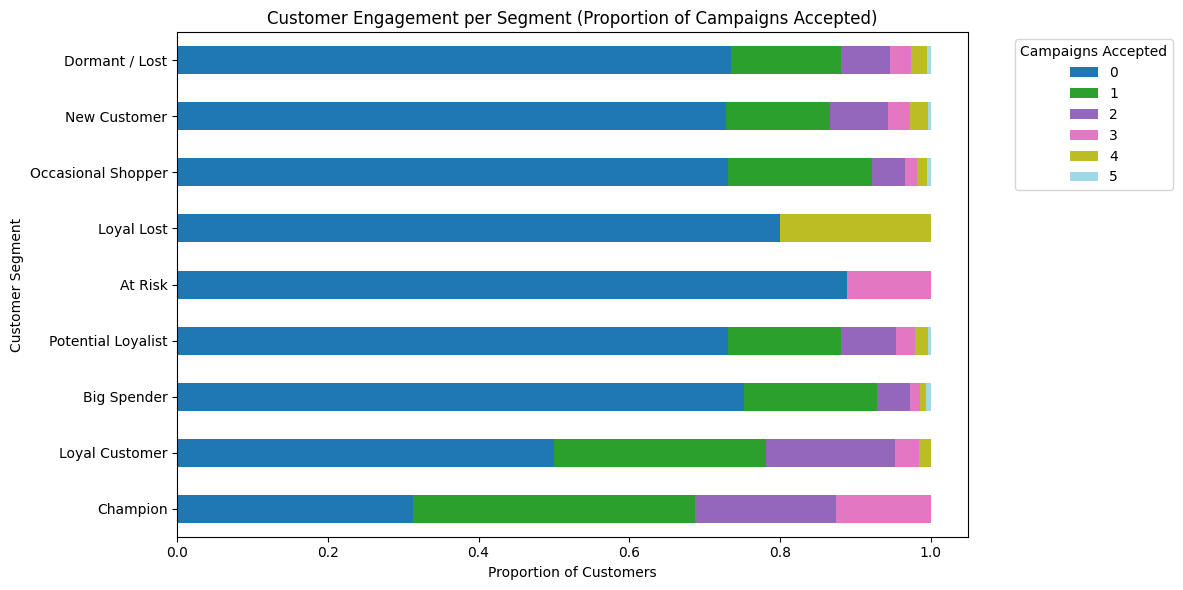

In [ ]:
pivot_norm = pivot_df.div(pivot_df.sum(axis=1), axis=0)

ax = pivot_norm.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 6),
    cmap='tab20'
)

plt.title("Customer Engagement per Segment (Proportion of Campaigns Accepted)")
plt.xlabel("Proportion of Customers")
plt.ylabel("Customer Segment")
plt.legend(
    title="Campaigns Accepted",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

**Insight:**

overall:
- rata-rata acceptance rate per campaign rendah (6-7%), hanya last campaign yang berhasil mencapai (15%)
- campaign 2 gagal total -> campaign tidak relevan(?)
- ada perbaikan campaign -> campaign makin relevan (?)


**1. High-Value Customers (Champion & Loyal Customer)**
- paling responsif terhadap campaing
- loyal customer: paling enggaged, banyak menerima campaign
- champion: enggaed di campaign tertenu saja
- rekomendasi: personalized offers!

**2. Growth Potential HVC (Potential Loyalist & Big Spender)**
- Big spender: sangat responsif seperti loyal customer
- potential loyalist: engagment masih rendah
- rekomendasi: nuturing (merawat hubungan, contoh: WA, personalized)

## **8. Purchase Channel Analysis by Customer Segment**

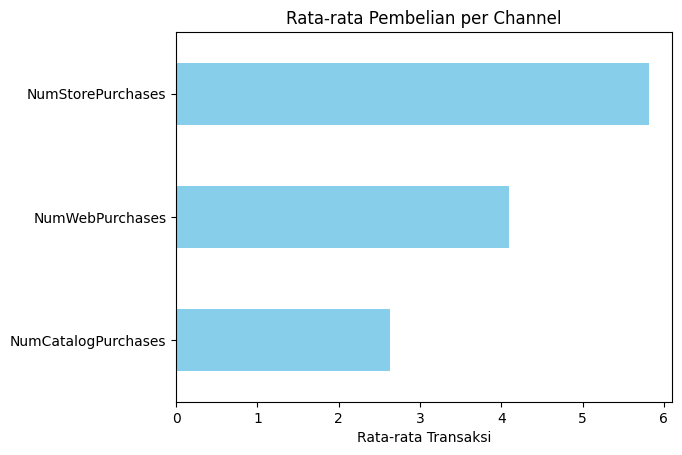

In [ ]:
df[channel_cols].mean().sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Rata-rata Transaksi")
plt.title("Rata-rata Pembelian per Channel")
plt.show()

In [ ]:
# pruchases channel per segmentation
channel_segment = df.groupby('cust_segment_class')[channel_cols].mean().reset_index()
channel_segment

,cust_segment_class,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,At Risk,3.666667,2.777778,5.777778
1,Big Spender,4.102725,2.419287,5.901468
2,Champion,5.125000,3.625000,6.687500
3,Dormant / Lost,4.343511,3.096692,6.137405
4,Loyal Customer,4.718750,3.203125,6.718750
5,Loyal Lost,4.600000,1.600000,6.200000
6,New Customer,3.463087,2.429530,5.560403
7,Occasional Shopper,4.187215,2.422374,5.529680
8,Potential Loyalist,4.100189,2.693762,5.727788


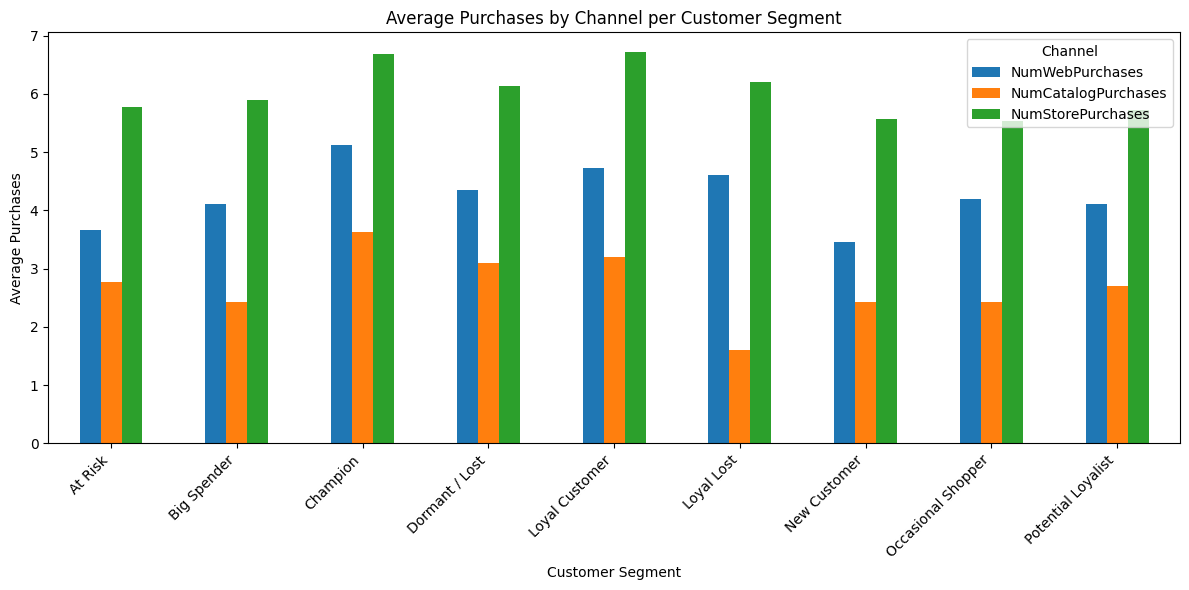

In [ ]:
channel_segment = channel_segment.set_index("cust_segment_class")

ax = channel_segment.plot(
    kind="bar",
    figsize=(12, 6)
)

plt.title("Average Purchases by Channel per Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Purchases")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Channel")
plt.tight_layout()
plt.show()

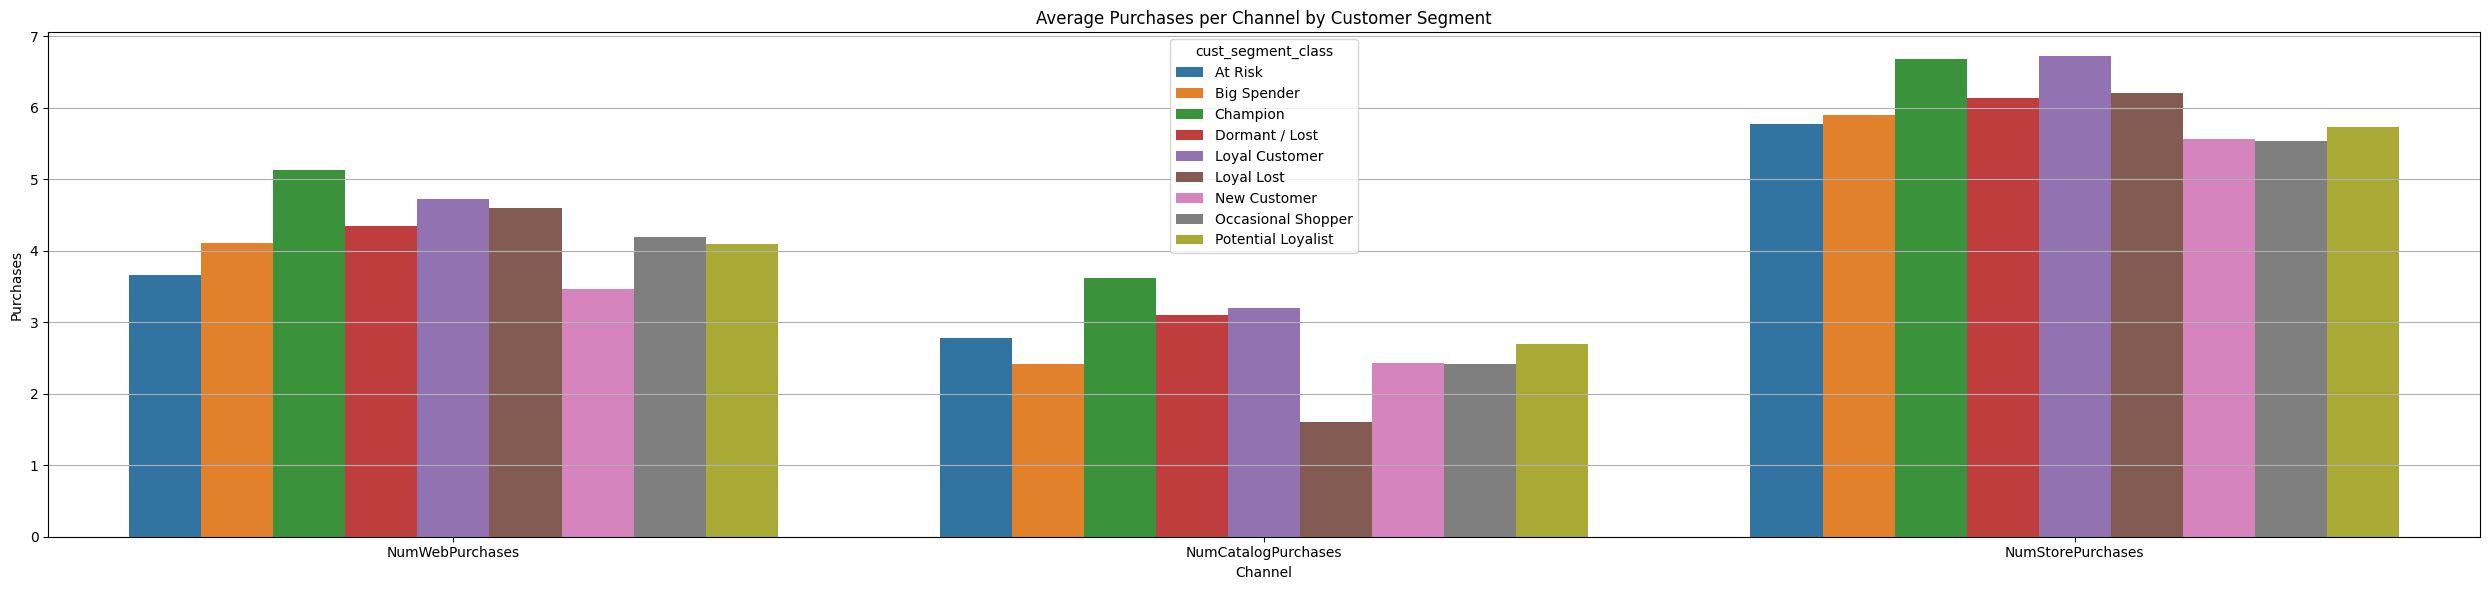

In [ ]:
channel_segment = df.groupby('cust_segment_class')[channel_cols].mean().reset_index()
channel_long = channel_segment.melt(
    id_vars='cust_segment_class',
    value_vars=channel_cols,
    var_name='Channel',
    value_name='Purchases'
)

# plot
plt.figure(figsize=(25,6))
sns.barplot(data=channel_long, x='Channel', y='Purchases', hue='cust_segment_class')
plt.title('Average Purchases per Channel by Customer Segment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

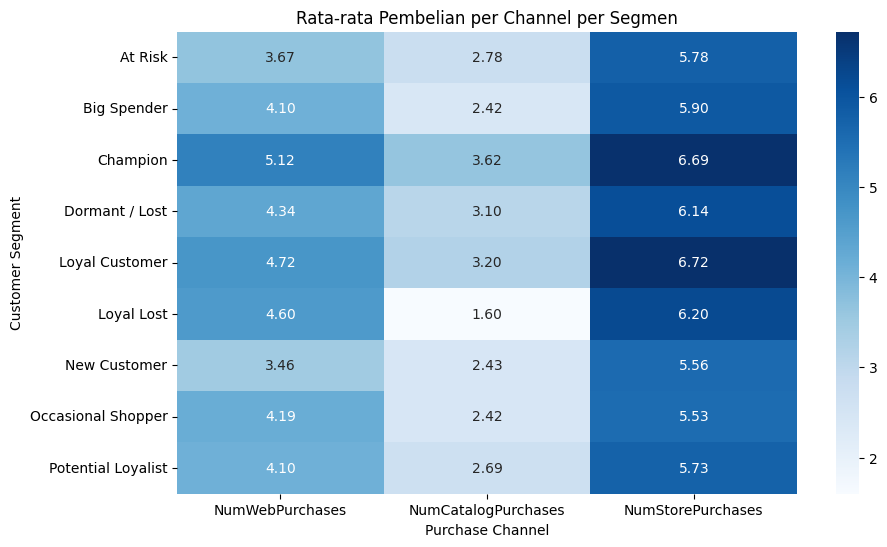

In [ ]:
channel_segment_indexed = channel_segment.set_index('cust_segment_class')

plt.figure(figsize=(10,6))
sns.heatmap(channel_segment_indexed, annot=True, fmt=".2f", cmap="Blues")
plt.title("Rata-rata Pembelian per Channel per Segmen")
plt.ylabel("Customer Segment")
plt.xlabel("Purchase Channel")
plt.show()

**Insight:**

**1. High-Value Customers (Champion & Loyal Customer)**
- champion:
    - belanja multichannel
- loyal customer:
    - belanja multichannel
-rekomendasi:
    - omnichannel loyaltyu program (i.e. poin yang didapat dari semua channel bisa ditukar disemua channel)

**2. Growth Potential HVC (Potential Loyalist & Big Spender)**
- big spender:
    - cenderung belanja offline
- potential loyalist:
    - dominan di store dan web
-rekomendasi:
    - digital promo

In [ ]:
df.to_excel('supermarket_customer_1.xlsx')
df_customer.to_excel('supermarket_customer_2.xlsx')

In [ ]:
df.sort_values('ID')

,ID,Age,Age_group,Education,Marital_Status,Income,Income_class,Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Expenses,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,cust_segment_class,TotalAccepted
212,0,29,Adult,Undergraduate,Relationship,70951.0,High,0,2013-05-04,66,239,10,554,254,87,54,1198,1,3,4,9,1,0,0,0,0,0,0,0,Big Spender,0
815,1,53,Middle age,Undergraduate,Single,57091.0,Medium,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,5,0,1,0,0,0,0,1,New Customer,2
1503,9,39,Adult,Master,Single,46098.0,Medium,2,2012-08-18,86,57,0,27,0,0,36,120,4,3,2,2,8,0,0,0,0,0,0,0,Potential Loyalist,0
1645,13,67,Elderly,Doctorate,Single,25358.0,Low,1,2013-07-22,57,19,0,5,0,0,8,32,2,1,0,3,6,0,0,0,0,0,0,0,Dormant / Lost,0
1897,17,43,Adult,Doctorate,Relationship,60491.0,Medium,1,2013-09-06,81,637,47,237,12,19,76,1028,4,6,11,7,5,0,0,0,0,0,0,0,Potential Loyalist,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,11176,44,Adult,Doctorate,Relationship,65968.0,Medium,1,2014-05-12,12,376,9,83,19,4,4,495,2,5,4,7,3,0,0,0,0,0,0,0,Big Spender,0
93,11178,42,Adult,Master,Single,42394.0,Medium,1,2014-03-23,69,15,2,10,0,1,4,32,1,1,0,3,7,0,0,0,0,0,0,0,Potential Loyalist,0
2173,11187,36,Adult,High school,Single,26487.0,Low,1,2013-05-20,23,2,8,10,12,14,23,69,3,2,1,3,5,0,0,0,0,0,0,0,Big Spender,0
990,11188,57,Middle age,Undergraduate,Relationship,26091.0,Low,2,2014-02-25,84,15,10,19,8,17,20,89,3,2,1,3,5,0,0,0,0,0,0,0,Potential Loyalist,0


In [ ]:
df_customer

,ID,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,cust_segment_class
0,0,421,66,22,1617,3,2,4,4,Big Spender
1,1,14,0,4,27,1,4,1,1,New Customer
2,9,680,86,20,776,4,1,4,3,Potential Loyalist
3,13,342,57,6,53,2,2,1,1,Dormant / Lost
4,17,296,81,14,422,2,1,3,3,Potential Loyalist
...,...,...,...,...,...,...,...,...,...,...
2224,11176,48,12,16,1341,1,4,3,4,Big Spender
2225,11178,98,69,15,444,1,2,3,3,Potential Loyalist
2226,11187,405,23,18,1241,3,4,3,4,Big Spender
2227,11188,124,84,21,843,1,1,4,3,Potential Loyalist


## **9. Summary**

## 1. Characteristics of High-Value Customers (HVC) & Retention Strategies

### Customer Characteristics
- **Champion & Loyal Customer (HVC)**
  - Adults (30–45), **high income**, well-educated.
  - Mostly **in relationship**, no children.
  - Spending concentrated on **Wine & Meat**.
  - Heavy **multichannel users** (web, catalog, store).
  - Responsive to high-value campaigns (Cmp1, Cmp5, Response).

- **Big Spender (Growth Potential)**
  - Adults, **high income**, no children.
  - High spending across all categories, store & catalog heavy.
  - Similar to HVC but not yet loyal.

- **Potential Loyalist (Growth Potential)**
  - Adults / Middle-aged, **medium income**, usually with 1 child.
  - Family-oriented spending (Meat, Fruits, Sweets).
  - Low campaign engagement.

---

###  Retention Strategies
- **Champion & Loyal Customer**
  - VIP programs (tiers, reward points, early access).
  - Personalized campaigns → less frequent, more relevant.
  - Focus on premium & lifestyle positioning, not just discounts.

- **Big Spender**
  - Push conversion into Loyal Customers.
  - Personalized service, luxury bundles, cross-selling.
  - Store events & premium catalog campaigns.

- **Potential Loyalist**
  - Loyalty starter program (bonus points for repeat purchase).
  - Family bundles (Meat + Fruits + Sweets).
  - Nurturing campaigns → education & affordable offers to drive repeat purchases.

---

## 2. Customer Responses to Campaigns & Strategies

###  Customer Response Characteristics
- **Overall Acceptance**
  - Generally low (6–7%), **highest in the last Response campaign (15%)**.
  - **Cmp2 failed (1.3%)** → irrelevant design/targeting.

- **By Segment**
  - **Most responsive**: Loyal Customers, Big Spenders, Champions (25–37% acceptance in Cmp5/Response).
  - **Moderate**: Potential Loyalists (10–12%), Occasional Shoppers (13% in Response).
  - **Low**: At Risk, Loyal Lost, Dormant → mostly 0 acceptance.
  - **New Customers**: low, but start engaging in Response (~8%).

- **Distribution**
  - 70%+ customers **never accepted any campaign (0 acceptance)**.
  - Only ~5% accepted ≥3 campaigns.
  - No segment consistently accepted all campaigns → *no one-size-fits-all campaign works*.

---

###  Campaign Strategies
- **Segmented Campaigns**
  - Champions & Loyal → VIP perks, premium bundles.
  - Big Spenders → personalized offers, push to loyalty tier.
  - Potential Loyalists → nurturing family bundles + starter loyalty program.
  - Occasional & New → welcome/activation campaigns.
  - At Risk, Loyal Lost, Dormant → selective reactivation only.

- **Channel Optimization**
  - HVC → omnichannel (web, catalog, store).
  - Growth Potential → store-heavy, supported by digital.
  - New/Occasional → start with store promotions, then move to web/app.

- **Benchmark Campaign**
  - The last Response campaign was the most successful (15%).
  - Its design (product, channel, targeting) should be replicated in future campaigns.

---

##  Key Takeaway
- **HVC**: Adults, high income, educated, no children, multichannel users → need **VIP experience & personalization**.  
- **Growth Potential HVC**:  
  - Big Spenders → similar to HVC, just need conversion to loyal.  
  - Potential Loyalists → need nurturing & affordable bundles.  
- **Campaigns**: Only high-value segments engage consistently → campaigns must be **segmented & relevant**, not mass-blasted.
